## <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 24px; color: #ffffff; font-weight: bold; padding: 12px; border-radius: 8px; background: linear-gradient(#2EA149, #1e3a8a, #4f46e5); text-align: right;"> تحلیل اکتشافی </div>


In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno

### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> خواندن دیتا </div>


In [85]:
df_ML=pd.read_csv('data_ML.csv')

In [86]:
df_ML

,Address,vehicle,motorcycle,bicycle,year,income,cost,trans_cost,real_income,real_cost,real_trans_cost
0,20003386609,False,False,True,1398,2.670000e+08,6.875200e+07,500000,6.480583e+06,1.668738e+06,12135.922330
1,20010394214,True,True,True,1398,1.448200e+09,1.921962e+08,2850000,3.515049e+07,4.664955e+06,69174.757282
2,20003387007,False,False,False,1398,6.760000e+07,3.683316e+07,1000000,1.640777e+06,8.940088e+05,24271.844660
3,20007392616,True,False,False,1398,1.800000e+08,8.704000e+07,1600000,4.368932e+06,2.112621e+06,38834.951456
4,20006390223,False,True,False,1398,3.216000e+08,4.056390e+08,200000,7.805825e+06,9.845607e+06,4854.368932
...,...,...,...,...,...,...,...,...,...,...,...
129336,13001373136,True,False,False,1401,5.230000e+09,1.293727e+09,9500000,1.124731e+08,2.782209e+07,204301.075269
129337,13001373138,True,False,False,1401,1.763980e+09,4.092450e+08,5200000,3.793505e+07,8.800968e+06,111827.956989
129338,13001370341,False,False,False,1401,1.897520e+09,1.559038e+08,4500000,4.080688e+07,3.352770e+06,96774.193548
129339,22104612941,False,False,False,1401,1.450200e+08,1.005710e+08,1000000,3.118710e+06,2.162817e+06,21505.376344


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> بررسی دیتا </div>


In [87]:
df_ML.describe()

,Address,year,income,cost,trans_cost,real_income,real_cost,real_trans_cost
count,1.293410e+05,129341.00000,1.111720e+05,1.293410e+05,1.293410e+05,1.111720e+05,1.293410e+05,1.293410e+05
mean,1.589392e+10,1399.45605,1.073183e+09,2.321505e+08,2.223930e+06,2.342904e+07,5.092549e+06,4.884229e+04
std,5.003648e+09,1.15155,3.690605e+09,7.777064e+08,3.461306e+06,7.970675e+07,1.681638e+07,7.491671e+04
min,1.000100e+10,1398.00000,0.000000e+00,1.574388e+06,1.500000e+04,0.000000e+00,3.342650e+04,3.184713e+02
25%,1.140217e+10,1398.00000,2.420000e+08,4.674900e+07,6.250000e+05,5.526680e+06,1.040467e+06,1.456311e+04
50%,1.270834e+10,1399.00000,4.713500e+08,1.041320e+08,1.350000e+06,1.045696e+07,2.318074e+06,3.010753e+04
75%,2.120253e+10,1401.00000,1.042010e+09,2.276995e+08,2.700000e+06,2.282475e+07,5.009462e+06,6.019417e+04
max,2.300671e+10,1401.00000,5.405600e+11,8.139410e+10,3.386000e+08,1.162495e+10,1.750411e+09,7.188960e+06


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> عددی کردن ستون های وسایل نقلیه</div>


In [88]:

bool_cols = ['vehicle', 'motorcycle', 'bicycle']  

for col in bool_cols:
    df_ML[col] = df_ML[col].astype(int)


print(df_ML.head())


       Address  vehicle  motorcycle  bicycle  year        income         cost  \
0  20003386609        0           0        1  1398  2.670000e+08   68752000.0   
1  20010394214        1           1        1  1398  1.448200e+09  192196164.0   
2  20003387007        0           0        0  1398  6.760000e+07   36833164.0   
3  20007392616        1           0        0  1398  1.800000e+08   87040000.0   
4  20006390223        0           1        0  1398  3.216000e+08  405639000.0   

   trans_cost   real_income     real_cost  real_trans_cost  
0      500000  6.480583e+06  1.668738e+06     12135.922330  
1     2850000  3.515049e+07  4.664955e+06     69174.757282  
2     1000000  1.640777e+06  8.940088e+05     24271.844660  
3     1600000  4.368932e+06  2.112621e+06     38834.951456  
4      200000  7.805825e+06  9.845607e+06      4854.368932  


## <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 24px; color: #ffffff; font-weight: bold; padding: 12px; border-radius: 8px; background: linear-gradient(#2EA149, #1e3a8a, #4f46e5); text-align: right;"> نمودارها</div>


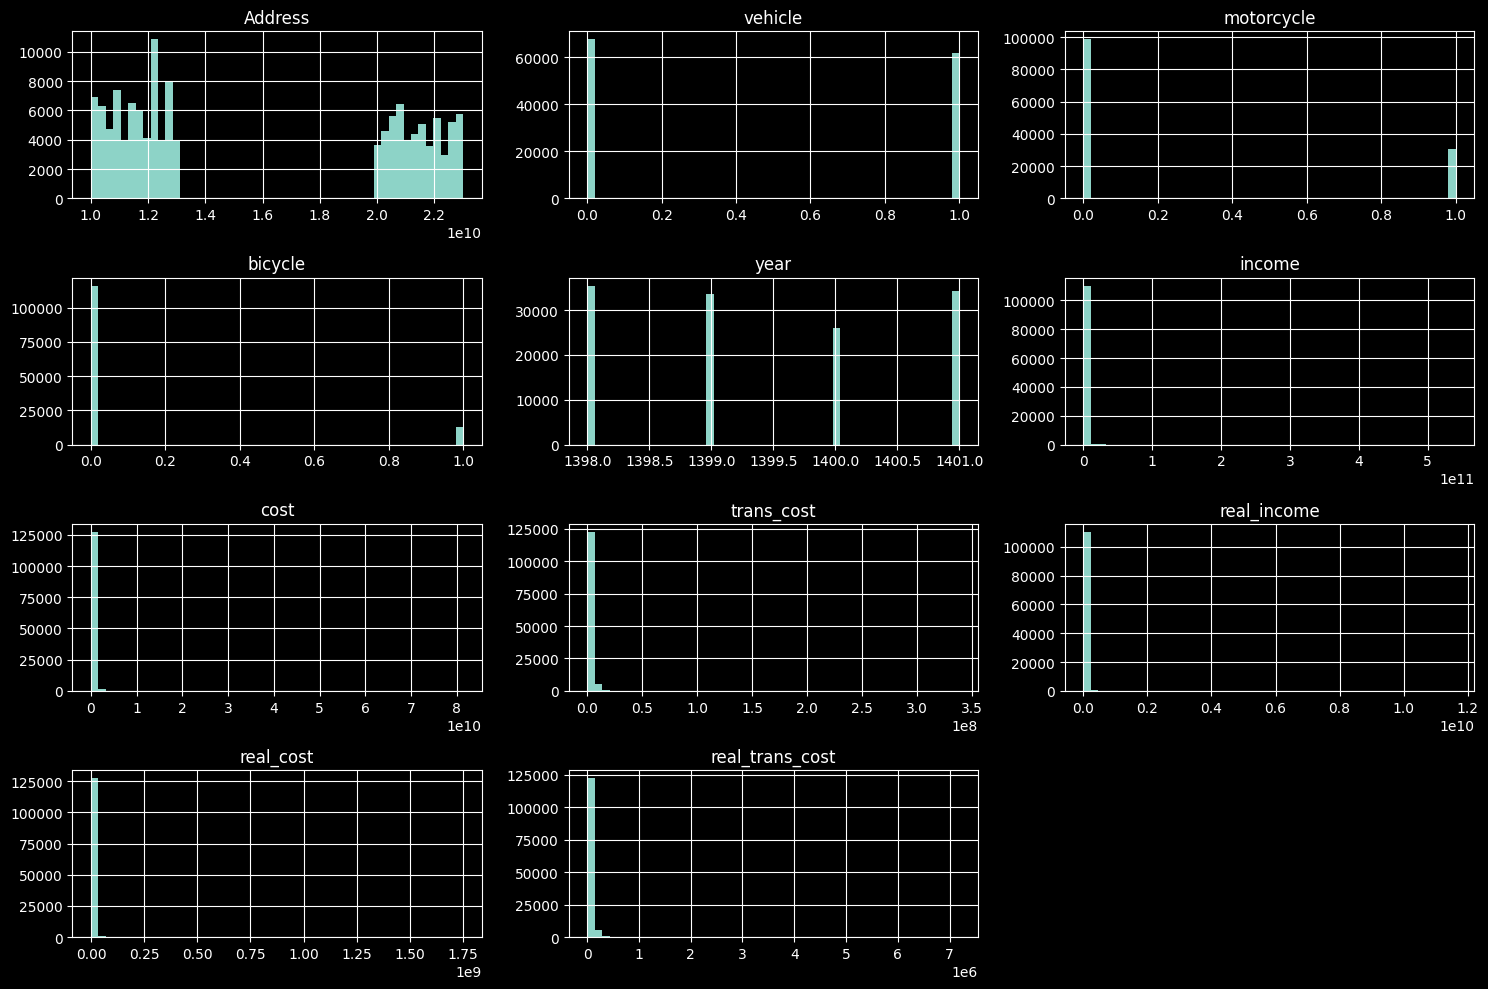

In [89]:
#plotting histogram to see distribution
df_ML.hist(bins=50, figsize=(15, 10))
plt.tight_layout()
plt.show()


<div style="direction: rtl; text-align: right; font-family: 'Vazir', sans-serif; background-color: #2c3e50; padding: 20px; border-radius: 8px; box-shadow: 0px 0px 10px rgba(0,0,0,0.3); color: #ecf0f1;">
  <h2 style="color: #f1c40f; text-align: center;">تحلیل نمودارها</h2>
  
  <p style="font-size: 16px; line-height: 1.6;">
    در این تحلیل، نمودارهای مختلفی که به ویژگی‌های متفاوتی از داده‌ها اشاره می‌کنند، بررسی شده‌اند. هر نمودار نمایانگر یکی از جنبه‌های مهم داده‌ها از جمله وسیله نقلیه، سال، درآمد، و هزینه است. نتایج این تحلیل به شرح زیر است:
  </p>
  
  <ul style="font-size: 16px; line-height: 1.8;">
    <li><strong>نمودار آدرس:</strong> داده‌ها در محدوده‌های خاصی از آدرس‌ها متمرکز شده‌اند و الگوی پراکندگی نرمال دیده نمی‌شود.</li>
    <li><strong>نمودار وسیله نقلیه:</strong> داده‌ها به صورت باینری (0 و 1) بوده و نشان‌دهنده حضور یا عدم حضور وسیله نقلیه در این داده‌ها هستند.</li>
    <li><strong>نمودار موتورسیکلت:</strong> مانند نمودار وسیله نقلیه، بیشتر داده‌ها در مقدار 0 متمرکز هستند که به معنای استفاده کم از موتورسیکلت است.</li>
    <li><strong>نمودار دوچرخه:</strong> تعداد کمی از داده‌ها در مقدار 1 هستند، نشان‌دهنده استفاده محدود از دوچرخه.</li>
    <li><strong>نمودار درآمد:</strong> بیشتر داده‌ها در مقادیر کم متمرکز شده‌اند اما برخی مقادیر بسیار بالایی نیز وجود دارد که نشان‌دهنده نابرابری اقتصادی است.</li>
    <li><strong>نمودار هزینه:</strong> هزینه‌ها بیشتر در مقادیر پایین متمرکز هستند، با تعدادی داده‌های پراکنده در مقادیر بالا.</li>
  </ul>

  <h3 style="color: #2ecc71;">تحلیل کلی:</h3>
  
  <p style="font-size: 16px; line-height: 1.6;">
    الگوی کلی نشان می‌دهد که بیشتر داده‌ها در مقادیر پایین متمرکز شده‌اند. به خصوص در نمودارهای مربوط به هزینه و درآمد، بیشتر مقادیر در نزدیک صفر بوده و نشان‌دهنده پراکندگی کم داده‌ها است. اما برخی مقادیر بسیار بالا می‌توانند نمایانگر عدم توازن یا نابرابری در داده‌ها باشند.
  </p>


  <p style="font-size: 16px; line-height: 1.6; color: #27ae60;">
    در نهایت، نتایج تحلیل نشان می‌دهد که ناهماهنگی‌هایی در داده‌ها وجود دارد و در برخی دسته‌ها مانند درآمد و هزینه، توزیع داده‌ها نشان‌دهنده اختلافات اقتصادی مهمی است.
  </p>
</div>


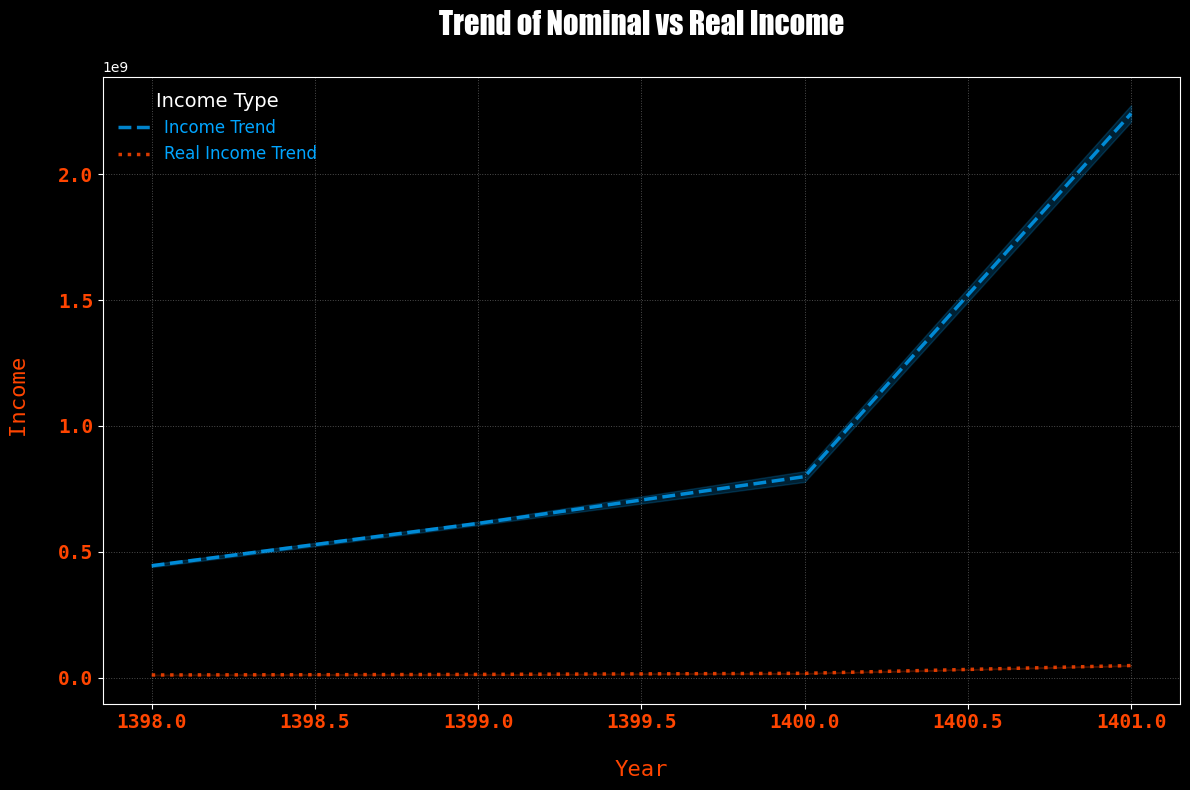

In [90]:
# Calculating the rolling averages for income trends
df_ML['income_trend'] = df_ML['income'].rolling(window=5).mean()
df_ML['real_income_trend'] = df_ML['real_income'].rolling(window=5).mean()

# dark backg
plt.style.use('dark_background')


plt.figure(figsize=(12, 8))


sns.lineplot(x=df_ML['year'], y=df_ML['income_trend'], label='Income Trend', color='#00A5FF', linewidth=2.5, linestyle='--', alpha=0.8)
sns.lineplot(x=df_ML['year'], y=df_ML['real_income_trend'], label='Real Income Trend', color='#FF4500', linewidth=2.5, linestyle=':', alpha=0.85)


plt.title('Trend of Nominal vs Real Income', fontsize=22, color='#FFFFFF', weight='bold', pad=30, fontfamily='fantasy')
plt.xlabel('Year', fontsize=16, color='#FF4500', fontfamily='monospace', labelpad=20)
plt.ylabel('Income ', fontsize=16, color='#FF4500', fontfamily='monospace', labelpad=20)

#Adding legend
plt.legend(title='Income Type', title_fontsize='14', fontsize='12', loc='upper left', frameon=False, facecolor='none', edgecolor='none', labelcolor='#00A5FF')

plt.xticks(fontsize=14, color='#FF4500', weight='bold', fontfamily='monospace')
plt.yticks(fontsize=14, color='#FF4500', weight='bold', fontfamily='monospace')


plt.grid(True, which='both', linestyle=':', linewidth=0.7, color='#FFFFFF', alpha=0.3)
plt.gca().patch.set_alpha(0)

plt.tight_layout()
plt.show()


<div style="direction: rtl; text-align: right; font-family: 'Vazir', sans-serif; background-color: #2c3e50; padding: 20px; border-radius: 8px; box-shadow: 0px 0px 10px rgba(0,0,0,0.3); color: #ecf0f1;">
  <h2 style="color: #f1c40f; text-align: center;">تحلیل روند درآمد اسمی و حقیقی</h2>
  
  <p style="font-size: 16px; line-height: 1.6;">
    نمودار فوق روند درآمد اسمی و حقیقی را طی سال‌های ۱۳۹۸ تا ۱۴۰۱ به تصویر می‌کشد. این دو شاخص به وضوح در نمودار با استفاده از خطوط متفاوت نمایش داده شده‌اند. خط آبی نشان‌دهنده درآمد اسمی و خط نارنجی نقطه‌چین، روند درآمد حقیقی را نمایش می‌دهد. در این تحلیل، نکات زیر به چشم می‌خورد:
  </p>
  
  <ul style="font-size: 16px; line-height: 1.8;">
    <li><strong>روند درآمد اسمی:</strong> درآمد اسمی طی سال‌های مذکور به تدریج افزایش یافته است و در سال ۱۴۰۰ جهش بزرگی در مقدار آن مشاهده می‌شود.</li>
    <li><strong>روند درآمد حقیقی:</strong> درآمد حقیقی به شکل قابل توجهی ثابت باقی مانده است و تغییرات چشمگیری در این شاخص دیده نمی‌شود. این موضوع نشان‌دهنده تورم و کاهش قدرت خرید حقیقی است، که با وجود افزایش درآمد اسمی، اثرات تورم بر کاهش ارزش پول جبران نشده است.</li>
  </ul>

  <h3 style="color: #2ecc71;">تحلیل کلی:</h3>
  
  <p style="font-size: 16px; line-height: 1.6;">
    افزایش درآمد اسمی با توجه به نمودار کاملاً مشخص است، اما این افزایش درآمد نتوانسته تأثیر مثبتی بر قدرت خرید و درآمد حقیقی داشته باشد. ثابت ماندن درآمد حقیقی بیانگر این است که تورم موجود، قدرت خرید افراد را تحت تاثیر قرار داده و رشد درآمدها تنها در ظاهر بوده است.
  </p>

  <p style="font-size: 16px; line-height: 1.6; color: #27ae60;">
    در مجموع، نتیجه‌گیری می‌شود که در طول این دوره زمانی، با وجود افزایش محسوس درآمد اسمی، درآمد حقیقی تغییرات مهمی نداشته و این موضوع نشان‌دهنده چالش‌های اقتصادی در ارتباط با تورم است.
  </p>
</div>


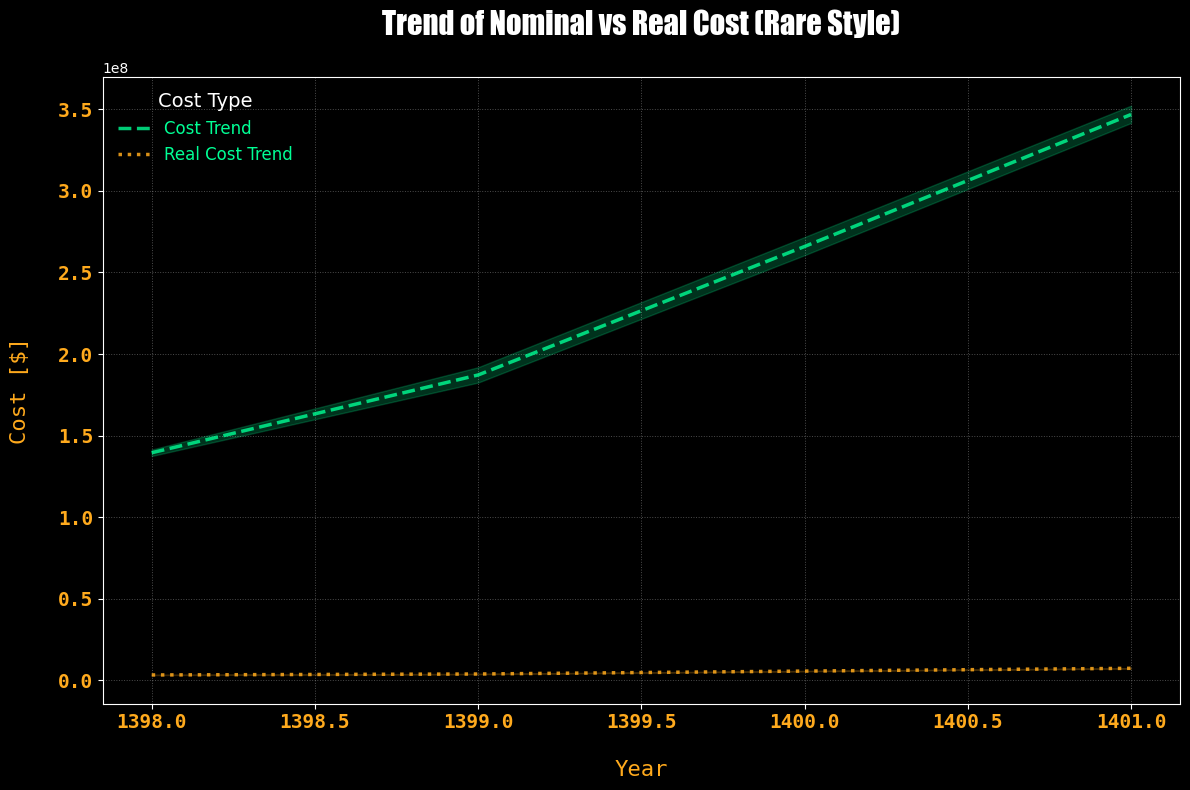

In [91]:
# Calculating the rolling averages for cost trends
df_ML['cost_trend'] = df_ML['cost'].rolling(window=5).mean()
df_ML['real_cost_trend'] = df_ML['real_cost'].rolling(window=5).mean()

# dark bckg
plt.style.use('dark_background')
plt.figure(figsize=(12, 8))

#line plots
sns.lineplot(x=df_ML['year'], y=df_ML['cost_trend'], label='Cost Trend', color='#00FF95', linewidth=2.5, linestyle='--', alpha=0.8)
sns.lineplot(x=df_ML['year'], y=df_ML['real_cost_trend'], label='Real Cost Trend', color='#FFAA1D', linewidth=2.5, linestyle=':', alpha=0.85)

plt.title('Trend of Nominal vs Real Cost (Rare Style)', fontsize=22, color='#FFFFFF', weight='bold', pad=30, fontfamily='fantasy')
plt.xlabel('Year', fontsize=16, color='#FFAA1D', fontfamily='monospace', labelpad=20)
plt.ylabel('Cost [$]', fontsize=16, color='#FFAA1D', fontfamily='monospace', labelpad=20)

# Adding legend
plt.legend(title='Cost Type', title_fontsize='14', fontsize='12', loc='upper left', frameon=False, facecolor='none', edgecolor='none', labelcolor='#00FF95')

plt.xticks(fontsize=14, color='#FFAA1D', weight='bold', fontfamily='monospace')
plt.yticks(fontsize=14, color='#FFAA1D', weight='bold', fontfamily='monospace')

plt.grid(True, which='both', linestyle=':', linewidth=0.7, color='#FFFFFF', alpha=0.3)
plt.gca().patch.set_alpha(0)


plt.tight_layout()

plt.show()


<div style="direction: rtl; text-align: right; font-family: 'Vazir', sans-serif; background-color: #2c3e50; padding: 20px; border-radius: 8px; box-shadow: 0px 0px 10px rgba(0,0,0,0.3); color: #ecf0f1;">
  <h2 style="color: #f1c40f; text-align: center;">تحلیل روند هزینه اسمی و حقیقی</h2>
  
  <p style="font-size: 16px; line-height: 1.6;">
     خط سبز نشان‌دهنده روند هزینه اسمی و خط نارنجی نقطه‌چین روند هزینه حقیقی را به تصویر می‌کشد. در این تحلیل، نکات زیر حائز اهمیت است:
  </p>
  
  <ul style="font-size: 16px; line-height: 1.8;">
    <li><strong>روند هزینه اسمی:</strong> در طول سال‌های ۱۳۹۸ تا ۱۴۰۱، هزینه‌های اسمی به صورت تدریجی افزایش یافته است و در نهایت در سال ۱۴۰۱ به اوج خود رسیده است. این افزایش می‌تواند ناشی از افزایش قیمت‌ها و تورم باشد.</li>
    <li><strong>روند هزینه حقیقی:</strong> مشابه با درآمد حقیقی، هزینه حقیقی نیز ثابت مانده و تغییر چندانی نداشته است. این موضوع می‌تواند نشان‌دهنده تأثیرات تورم بر هزینه‌های حقیقی باشد که قدرت خرید افراد را کاهش داده است.</li>
  </ul>

  <h3 style="color: #2ecc71;">تحلیل کلی:</h3>
  
  <p style="font-size: 16px; line-height: 1.6;">
    با افزایش تدریجی هزینه‌های اسمی طی این دوره، به نظر می‌رسد که قدرت خرید و هزینه‌های حقیقی مردم تغییر چندانی نداشته و تورم تأثیر مهمی در این زمینه داشته است. این روند نشان می‌دهد که با وجود افزایش هزینه‌ها، هزینه حقیقی همانند درآمد حقیقی ثابت مانده و تغییرات اسمی تنها در ظاهر بوده است.
  </p>

  <p style="font-size: 16px; line-height: 1.6; color: #27ae60;">
    در مجموع، نتیجه این نمودار نشان‌دهنده تأثیرات اقتصادی تورم بر هزینه‌ها است که باعث شده افزایش هزینه‌های اسمی تأثیری بر هزینه‌های حقیقی نگذارد.
  </p>
</div>


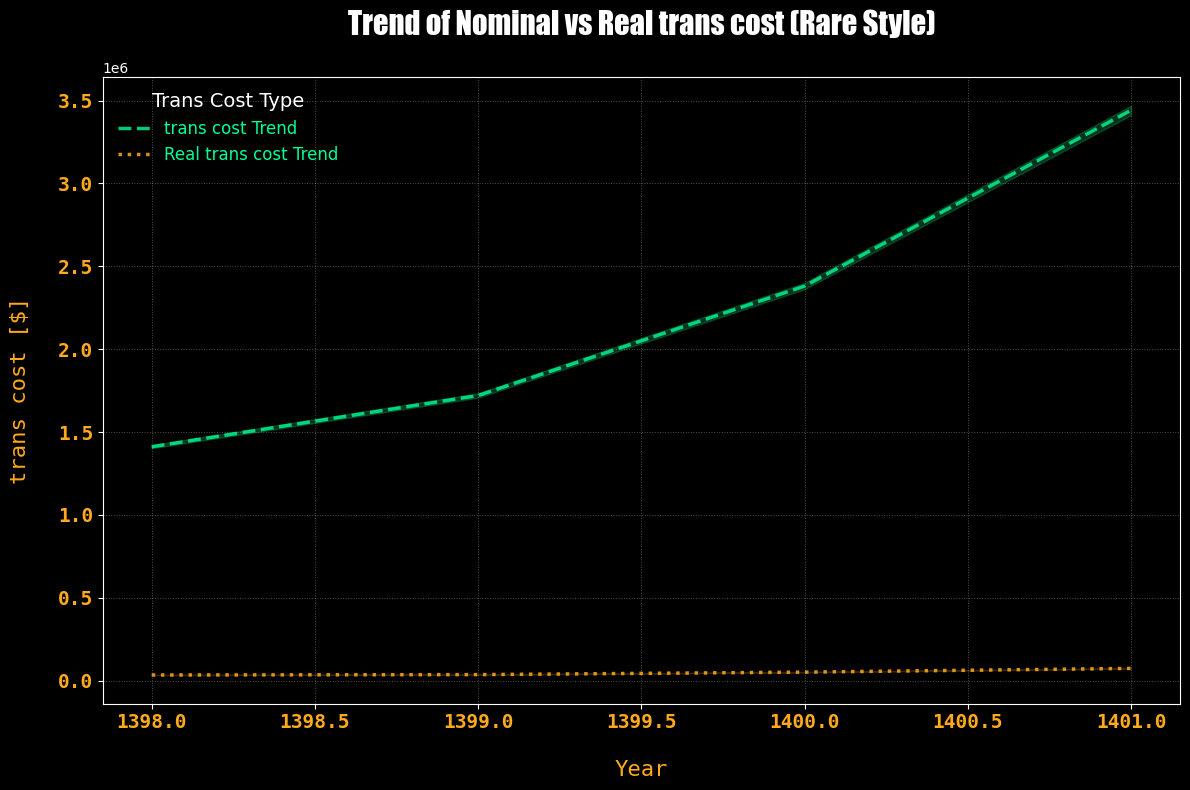

In [92]:
# Calculating the rolling averages for trans cost trends
df_ML['trans_cost_trend'] = df_ML['trans_cost'].rolling(window=5).mean()
df_ML['real_trans_cost_trend'] = df_ML['real_trans_cost'].rolling(window=5).mean()

# dark backg
plt.style.use('dark_background')


plt.figure(figsize=(12, 8))
sns.lineplot(x=df_ML['year'], y=df_ML['trans_cost_trend'], label='trans cost Trend', color='#00FF95', linewidth=2.5, linestyle='--', alpha=0.8)
sns.lineplot(x=df_ML['year'], y=df_ML['real_trans_cost_trend'], label='Real trans cost Trend', color='#FFAA1D', linewidth=2.5, linestyle=':', alpha=0.85)

plt.title('Trend of Nominal vs Real trans cost (Rare Style)', fontsize=22, color='#FFFFFF', weight='bold', pad=30, fontfamily='fantasy')
plt.xlabel('Year', fontsize=16, color='#FFAA1D', fontfamily='monospace', labelpad=20)
plt.ylabel('trans cost [$]', fontsize=16, color='#FFAA1D', fontfamily='monospace', labelpad=20)

# Adding legend
plt.legend(title='Trans Cost Type', title_fontsize='14', fontsize='12', loc='upper left', frameon=False, facecolor='none', edgecolor='none', labelcolor='#00FF95')

plt.xticks(fontsize=14, color='#FFAA1D', weight='bold', fontfamily='monospace')
plt.yticks(fontsize=14, color='#FFAA1D', weight='bold', fontfamily='monospace')

plt.grid(True, which='both', linestyle=':', linewidth=0.7, color='#FFFFFF', alpha=0.3)

plt.gca().patch.set_alpha(0)
plt.tight_layout()


plt.show()


<div style="direction: rtl; text-align: right; font-family: 'Vazir', sans-serif; background-color: #2c3e50; padding: 20px; border-radius: 8px; box-shadow: 0px 0px 10px rgba(0,0,0,0.3); color: #ecf0f1;">
  <h2 style="color: #f1c40f; text-align: center;"> تحلیل روند هزینه اسمی و حقیقی حمل و نقل</h2>
  
  <p style="font-size: 16px; line-height: 1.6;">
     خط سبز نشان‌دهنده روند هزینه اسمی حمل‌و‌نقل و خط نارنجی نقطه‌ چین روند هزینه حقیقی حمل‌و‌نقل را به تصویر می‌کشد. در این تحلیل، نکات زیر حائز اهمیت است:
  </p>
  
  <ul style="font-size: 16px; line-height: 1.8;">
    <li><strong>روند هزینه اسمی حمل‌و‌نقل:</strong> در طول سال‌های ۱۳۹۸ تا ۱۴۰۱، هزینه‌های اسمی حمل‌و‌نقل به صورت تدریجی افزایش یافته است و در نهایت در سال ۱۴۰۱ به اوج خود رسیده است. این افزایش می‌تواند ناشی از افزایش قیمت‌ها و تورم باشد.</li>
    <li><strong>روند هزینه حقیقی حمل‌و‌نقل:</strong> مشابه با درآمد حقیقی، هزینه حقیقی نیز ثابت مانده و تغییر چندانی نداشته است. این موضوع می‌تواند نشان‌دهنده تأثیرات تورم بر هزینه‌های حقیقی باشد که قدرت خرید افراد را کاهش داده است.</li>
  </ul>

  <h3 style="color: #2ecc71;">تحلیل کلی:</h3>
  
  <p style="font-size: 16px; line-height: 1.6;">
    با افزایش تدریجی هزینه‌های اسمی حمل‌و‌نقل طی این دوره، به نظر می‌رسد که قدرت خرید و هزینه‌های حقیقی حمل‌و‌نقل مردم تغییر چندانی نداشته و تورم تأثیر مهمی در این زمینه داشته است. این روند نشان می‌دهد که با وجود افزایش هزینه‌ها، هزینه حقیقی همانند درآمد حقیقی ثابت مانده و تغییرات اسمی تنها در ظاهر بوده است.
  </p>

  <p style="font-size: 16px; line-height: 1.6; color: #27ae60;">
    در مجموع، نتیجه این نمودار نشان‌دهنده تأثیرات اقتصادی تورم بر هزینه‌ها است که باعث شده افزایش هزینه‌های اسمی تأثیری بر هزینه‌های حقیقی نگذارد.
  </p>
</div>


In [93]:
df_ML.columns

Index(['Address', 'vehicle', 'motorcycle', 'bicycle', 'year', 'income', 'cost',
       'trans_cost', 'real_income', 'real_cost', 'real_trans_cost',
       'income_trend', 'real_income_trend', 'cost_trend', 'real_cost_trend',
       'trans_cost_trend', 'real_trans_cost_trend'],
      dtype='object')

In [94]:
df_ML.drop([
       'income_trend', 'real_income_trend', 'cost_trend', 'real_cost_trend',
       'real_cost_trend'],axis=1, inplace=True)

In [95]:
df_ML

,Address,vehicle,motorcycle,bicycle,year,income,cost,trans_cost,real_income,real_cost,real_trans_cost,trans_cost_trend,real_trans_cost_trend
0,20003386609,0,0,1,1398,2.670000e+08,6.875200e+07,500000,6.480583e+06,1.668738e+06,12135.922330,NaN,NaN
1,20010394214,1,1,1,1398,1.448200e+09,1.921962e+08,2850000,3.515049e+07,4.664955e+06,69174.757282,NaN,NaN
2,20003387007,0,0,0,1398,6.760000e+07,3.683316e+07,1000000,1.640777e+06,8.940088e+05,24271.844660,NaN,NaN
3,20007392616,1,0,0,1398,1.800000e+08,8.704000e+07,1600000,4.368932e+06,2.112621e+06,38834.951456,NaN,NaN
4,20006390223,0,1,0,1398,3.216000e+08,4.056390e+08,200000,7.805825e+06,9.845607e+06,4854.368932,1230000.0,29854.368932
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129336,13001373136,1,0,0,1401,5.230000e+09,1.293727e+09,9500000,1.124731e+08,2.782209e+07,204301.075269,11440000.0,246021.505376
129337,13001373138,1,0,0,1401,1.763980e+09,4.092450e+08,5200000,3.793505e+07,8.800968e+06,111827.956989,11680000.0,251182.795699
129338,13001370341,0,0,0,1401,1.897520e+09,1.559038e+08,4500000,4.080688e+07,3.352770e+06,96774.193548,11080000.0,238279.569892
129339,22104612941,0,0,0,1401,1.450200e+08,1.005710e+08,1000000,3.118710e+06,2.162817e+06,21505.376344,8120000.0,174623.655914


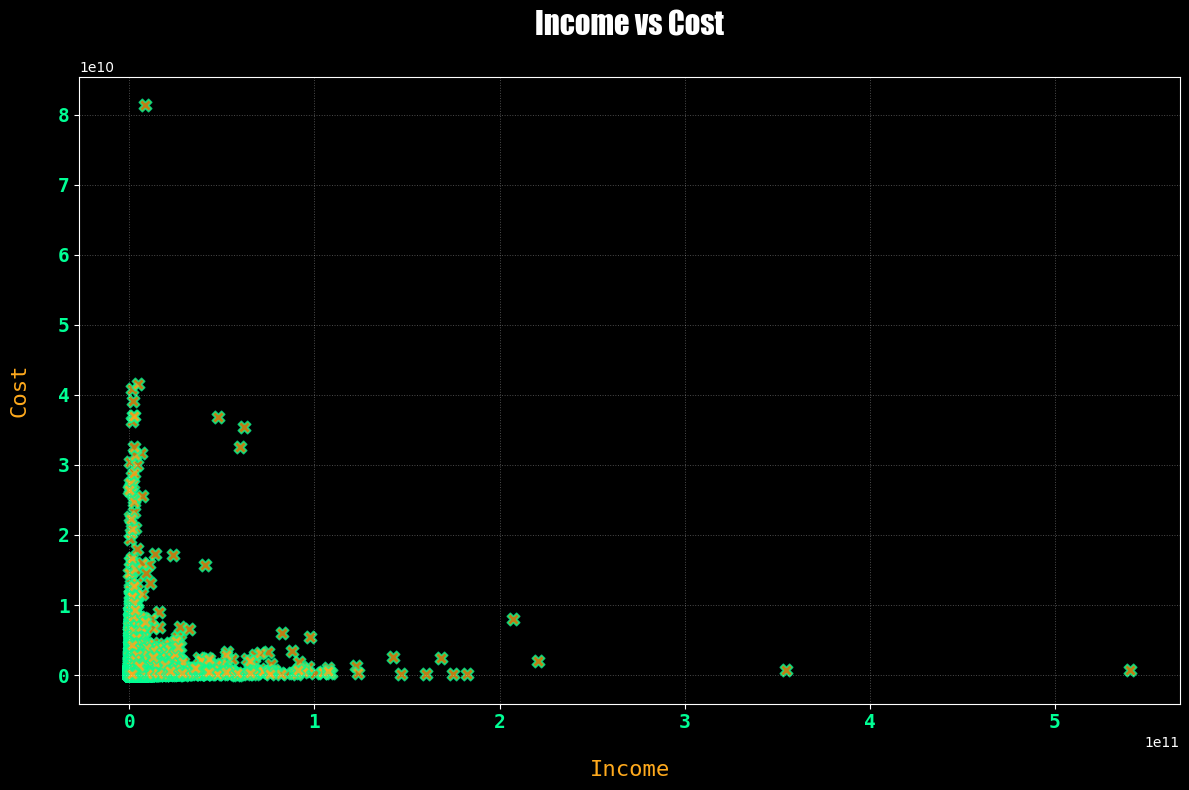

In [96]:

# dark background
plt.style.use('dark_background')


plt.figure(figsize=(12, 8))

sns.scatterplot(
    x='income', y='cost', data=df_ML, 
    s=80, marker='X', color='#FFAA1D', 
    edgecolor='#00FF95', linewidth=1.2, alpha=0.75  
)


plt.title('Income vs Cost', fontsize=22, color='#FFFFFF', weight='bold', pad=30, fontfamily='fantasy')
plt.xlabel('Income', fontsize=16, color='#FFAA1D', fontfamily='monospace', labelpad=20)
plt.ylabel('Cost', fontsize=16, color='#FFAA1D', fontfamily='monospace', labelpad=20)

plt.grid(True, which='both', linestyle=':', linewidth=0.7, color='#FFFFFF', alpha=0.3)

plt.xticks(fontsize=14, color='#00FF95', weight='bold', fontfamily='monospace')
plt.yticks(fontsize=14, color='#00FF95', weight='bold', fontfamily='monospace')


plt.gca().patch.set_alpha(0) 
plt.tight_layout()
plt.show()


<div style="direction: rtl; text-align: right; font-family: 'Vazir', sans-serif; background-color: #2c3e50; padding: 20px; border-radius: 8px; box-shadow: 0px 0px 10px rgba(0,0,0,0.3); color: #ecf0f1;"> <h2 style="color: #f1c40f; text-align: center;">تحلیل ارتباط بین درآمد و هزینه</h2> <p style="font-size: 16px; line-height: 1.6;"> این نمودار پراکندگی رابطه بین <strong>درآمد</strong> و <strong>هزینه</strong> را به تصویر می‌کشد. با مشاهده داده‌ها می‌توان نتایج زیر را استخراج کرد: </p> <ul style="font-size: 16px; line-height: 1.8;"> <li><strong>تمرکز داده‌ها در مقادیر پایین درآمد:</strong> بخش عمده‌ای از داده‌ها در محدوده درآمدهای پایین (زیر 1e10) متمرکز شده‌اند و نشان می‌دهد که در این سطح، هزینه‌ها دارای مقادیر مختلفی هستند. این می‌تواند ناشی از تفاوت در ساختار هزینه برای درآمدهای کمتر باشد.</li> <li><strong>رابطه ضعیف بین درآمد و هزینه:</strong> به نظر می‌رسد که رابطه مشخص و مستقیمی بین افزایش درآمد و هزینه وجود ندارد. بسیاری از نقاط نشان‌دهنده این هستند که با افزایش درآمد، هزینه‌ها لزوماً افزایش نمی‌یابند و حتی در بعضی موارد، هزینه‌ها کاهش می‌یابند یا ثابت می‌مانند.</li> <li><strong>پراکندگی زیاد در محدوده‌های پایین:</strong> برای درآمدهای کمتر، پراکندگی زیادی در هزینه‌ها وجود دارد که نشان‌دهنده پیچیدگی و تفاوت در مدیریت هزینه‌ها است. این ممکن است به دلیل عوامل متعدد اقتصادی،</li> </ul> <h3 style="color: #2ecc71;">تحلیل کلی:</h3> <p style="font-size: 16px; line-height: 1.6;"> با توجه به داده‌های این نمودار، می‌توان گفت که هیچ الگوی ساده‌ای از ارتباط مستقیم بین درآمد و هزینه‌ها وجود ندارد. در درآمدهای پایین‌تر، هزینه‌ها بسیار پراکنده و متنوع هستند، در حالی که در درآمدهای بالاتر، داده‌ها کمتر شده و هزینه‌ها نسبتاً پایدارتر هستند. این تحلیل نشان می‌دهد که عوامل دیگری ممکن است در رابطه بین درآمد و هزینه دخیل باشند که فراتر از خود درآمد است. </p> <p style="font-size: 16px; line-height: 1.6; color: #27ae60;"> نتیجه کلی این تحلیل این است که هرچند انتظار می‌رود با افزایش درآمد، هزینه‌ها نیز افزایش یابند، اما این نمودار نشان می‌دهد که این رابطه همیشه ثابت نیست و ممکن است تحت تأثیر عوامل دیگری قرار گیرد. </p> </div>

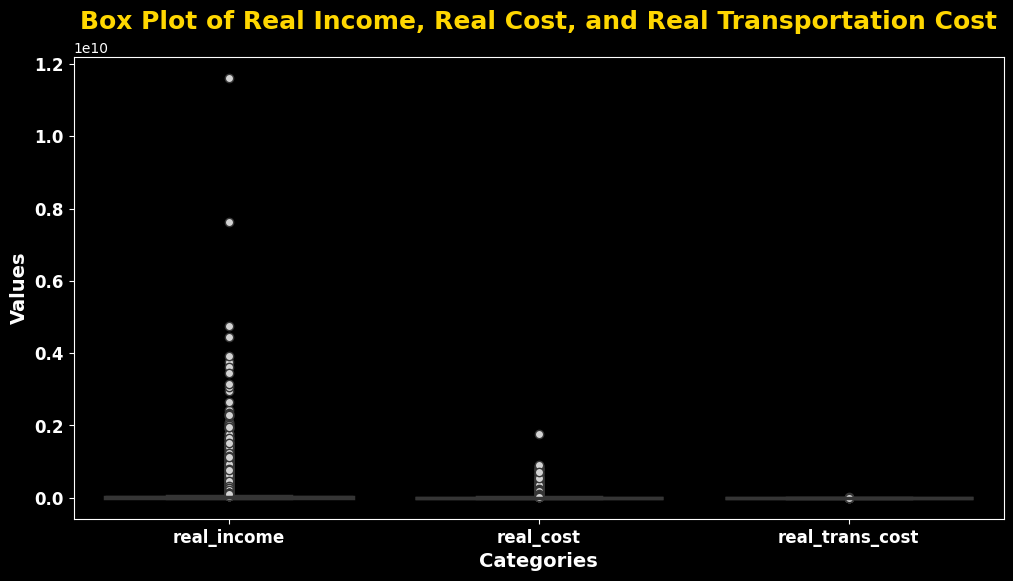

In [97]:

# dark backg
plt.style.use('dark_background')
plt.figure(figsize=(12, 6))

#scatters style
flierprops = dict(marker='o', markerfacecolor='lightgrey', markersize=6, linestyle='none')

sns.boxplot(data=df_ML[['real_income', 'real_cost', 'real_trans_cost']],
            palette="viridis", linewidth=2.5, fliersize=6,flierprops=flierprops)

plt.title('Box Plot of Real Income, Real Cost, and Real Transportation Cost', 
          fontsize=18, color='#FFD700', weight='bold', pad=20)
plt.xlabel('Categories', fontsize=14, color='#FFFFFF', weight='bold')
plt.ylabel('Values', fontsize=14, color='#FFFFFF', weight='bold')


plt.xticks(fontsize=12, color='#FFFFFF', weight='bold')
plt.yticks(fontsize=12, color='#FFFFFF', weight='bold')

plt.show()

<div style="direction: rtl; text-align: right; font-family: 'Vazir', sans-serif; background-color: #2c3e50; padding: 20px; border-radius: 8px; box-shadow: 0px 0px 10px rgba(0,0,0,0.3); color: #ecf0f1;">
  <h2 style="color: #f1c40f; text-align: center;"> تحلیل توزیع درآمد حقیفی و مجموع هزینه های حقیقی و هزینه های حقیقی حمل‌و‌نقل</h2>
  

  
  <ul style="font-size: 16px; line-height: 1.8;">
    <li><strong>توزیع درآمد حقیقی:</strong>درآمد حقیقی خانوارها در بازه وسیعی قرار گرفته است</li>
    <li><strong>توزیع هزینه حقیقی :</strong>هزینه های حقیقی در بازه ی کوتاهی قرار گرفته است. </li>
  </ul>
    <li><strong>توزیع هزینه حقیقی حمل‌و‌نقل:</strong>هزینه های حمل‌و‌نقل در بازه ی نسبتا کوتاهی قرار گرفته است با توجه به مقیاس بزرگ نمودار ، می‌توانیم افزایش این ویژگی طی سال ها را در نمودار های قبلی مشاهده کنیم </li>
  </ul>


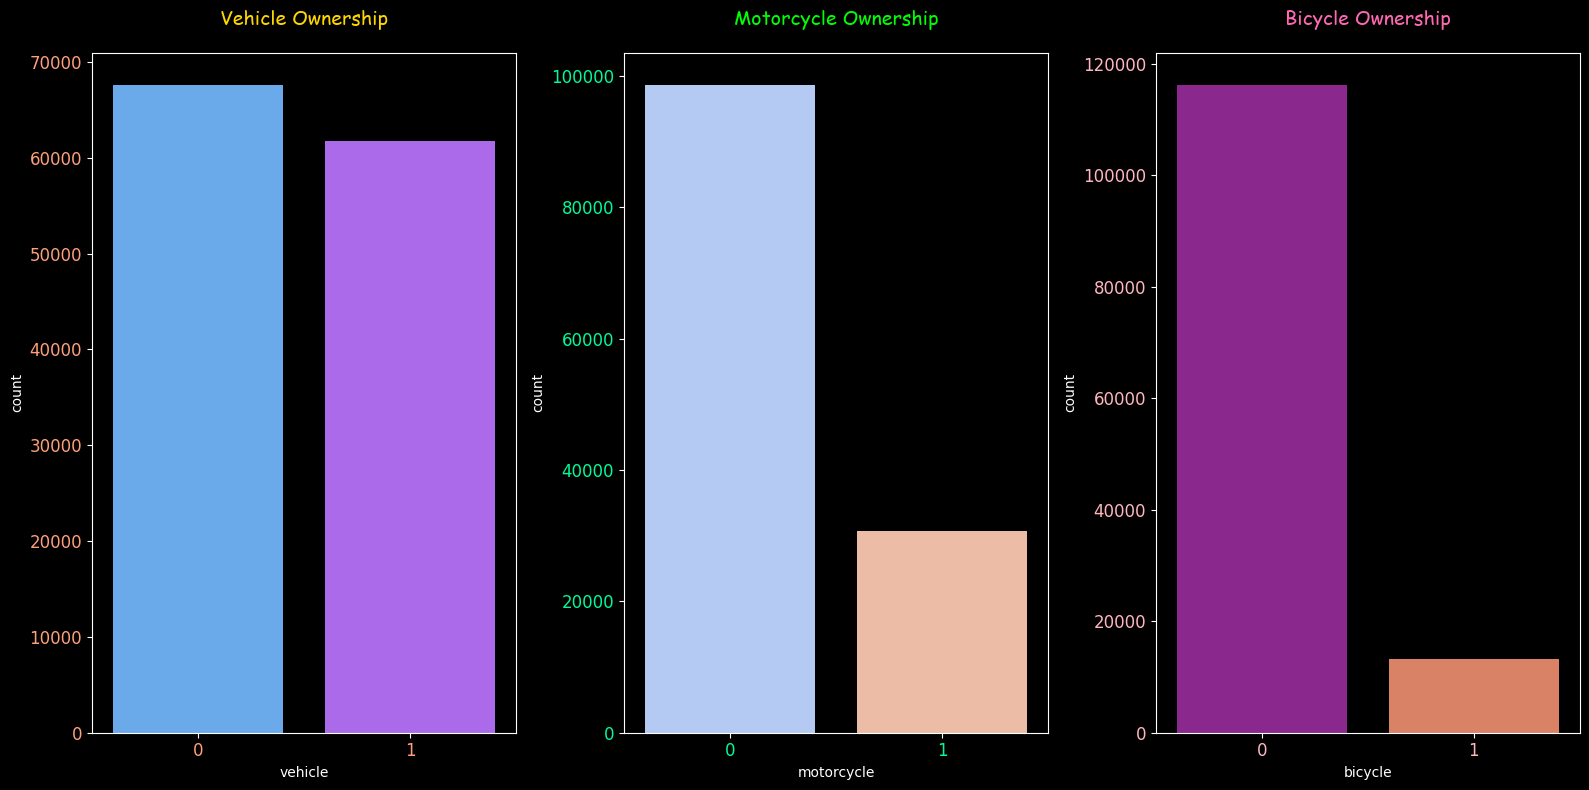

In [98]:

plt.style.use('dark_background')

plt.figure(figsize=(16, 8))

# Vehicle
plt.subplot(1, 3, 1)
sns.countplot(x='vehicle', data=df_ML, palette='cool', hue='vehicle', legend=False)
plt.title('Vehicle Ownership', fontsize=14, color='#FFD700', fontfamily='cursive', pad=20)
plt.xticks(fontsize=12, color='#FFA07A')
plt.yticks(fontsize=12, color='#FFA07A')

# Motorcycle
plt.subplot(1, 3, 2)
sns.countplot(x='motorcycle', data=df_ML, palette='coolwarm', hue='motorcycle', legend=False)
plt.title('Motorcycle Ownership', fontsize=14, color='#00FF00', fontfamily='cursive', pad=20)
plt.xticks(fontsize=12, color='#00FA9A')
plt.yticks(fontsize=12, color='#00FA9A')

# Bicycle
plt.subplot(1, 3, 3)
sns.countplot(x='bicycle', data=df_ML, palette='plasma', hue='bicycle', legend=False)
plt.title('Bicycle Ownership', fontsize=14, color='#FF69B4', fontfamily='cursive', pad=20)
plt.xticks(fontsize=12, color='#FFB6C1')
plt.yticks(fontsize=12, color='#FFB6C1')

plt.tight_layout()
plt.show()

In [99]:
vehicle_count = df_ML[df_ML['vehicle'] == 1].shape[0]
print(f"Number of families that own a vehicle: {vehicle_count}")

motorcycle_count = df_ML[df_ML['motorcycle'] == 1].shape[0]
print(f"Number of families that own a motorcycle: {motorcycle_count}")

bicycle_count = df_ML[df_ML['bicycle'] == 1].shape[0]
print(f"Number of families that own a bicycle: {bicycle_count}")

Number of families that own a vehicle: 61753
Number of families that own a motorcycle: 30726
Number of families that own a bicycle: 13194


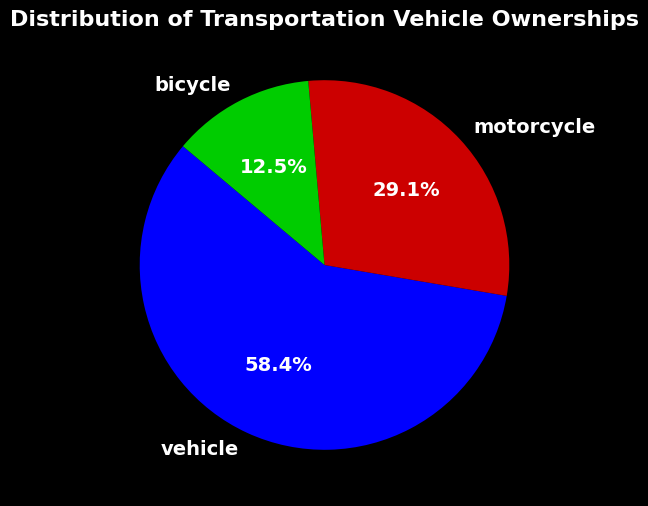

In [100]:
#pie chart
#defining quantity
transportation_counts = {
    'vehicle': vehicle_count,
    'motorcycle': motorcycle_count,
    'bicycle': bicycle_count
}

# Labels and sizes for pie chart
labels = transportation_counts.keys()
sizes = transportation_counts.values()

colors = ['#0000FF', '#CC0000', '#00CC00']

plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, 
                                   textprops={'fontsize': 14, 'fontweight': 'bold'})

# Making the percentage text bold and white
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.title('Distribution of Transportation Vehicle Ownerships', fontsize=16, fontweight='bold')


plt.show()

<div style="direction: rtl; text-align: right; font-family: 'Vazir', sans-serif; background-color: #2c3e50; padding: 20px; border-radius: 8px; box-shadow: 0px 0px 10px rgba(0,0,0,0.3); color: #ecf0f1;">
  <h2 style="color: #f1c40f; text-align: center;"> تحلیل توزیع وسیله نقلیه مورد استفاده خانوارها</h2>
  

  
  <ul style="font-size: 16px; line-height: 1.8;">
    <li><strong>خودرو: </strong>تعداد دو گروهی که از خودرو استفاده می‌کنند و نمی‌کنند، تقریبا برابر است.</li>
    <li><strong>موتور:</strong>استفاده از موتور میان خانوار ها کم است. </li>
    <li><strong>دوچرخه:</strong>استفاده از دوچرخه میان خانوار ها بسیار کم است. </li>
  </ul>
  <h3 style="color: #2ecc71;">تحلیل کلی:</h3>
  
  <p style="font-size: 16px; line-height: 1.6;">
    خانوار ها به صورت عمده صاحب خودرو نیستند ولی با توجه به تعداد خانوارهای صاحب خودرو (61753 خانوار)، نسبت به مالکیت موتور(30726 خانوار) و دوچرخه (13194 خانوار)، می‌توان گفت بیشترین مالکیت وسیله نقلیه میان خانوارها به مالکیت خودرو تعلق دارد. 
  </p>




In [101]:
#dropping unwanted cols

df_ML=df_ML[['Address', 'vehicle', 'motorcycle', 'bicycle', 'year', 'income', 'cost',
       'trans_cost', 'real_income', 'real_cost', 'real_trans_cost']]

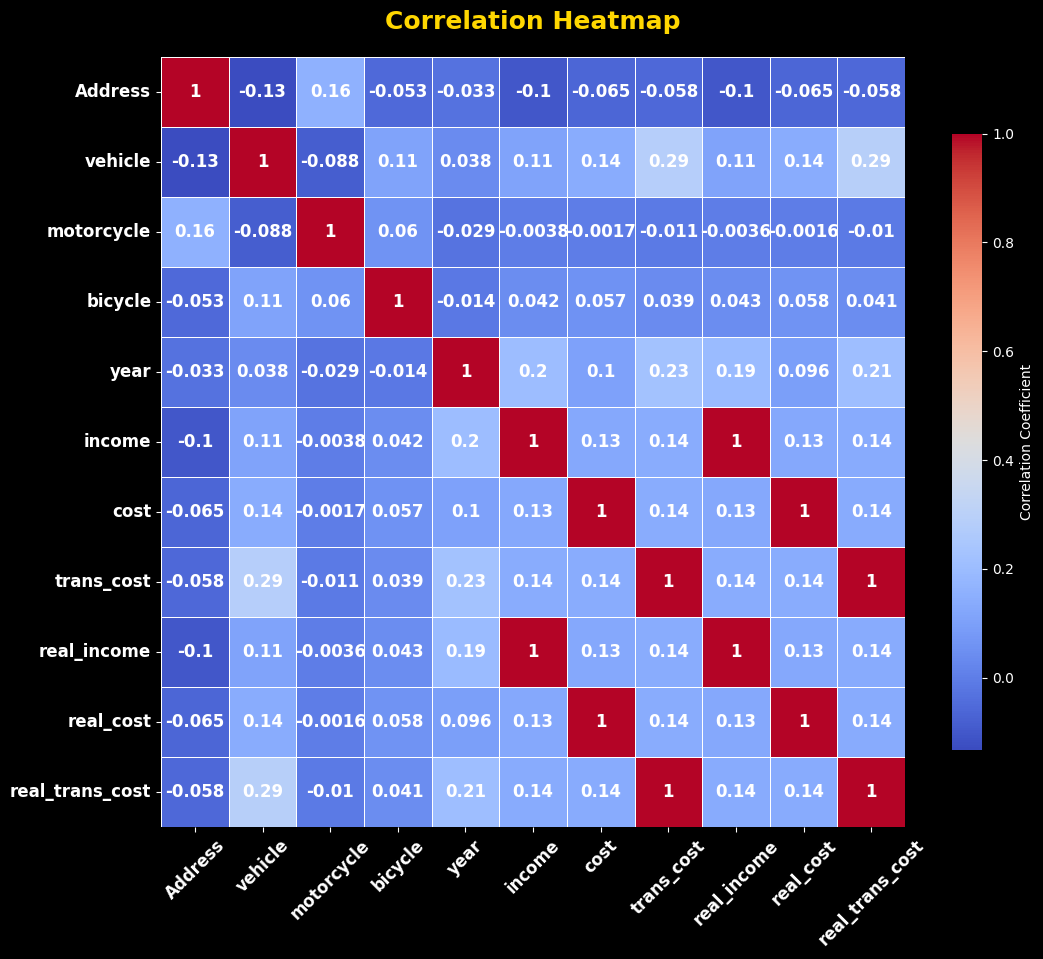

In [102]:


# Calculating correlation matrix
corr_matrix = df_ML.corr()

# dark backg
plt.style.use('dark_background')
plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='white',
            cbar_kws={"shrink": .8, 'label': 'Correlation Coefficient'},
            annot_kws={"size": 12, "weight": "bold", "color": "#FFFFFF"})

plt.title('Correlation Heatmap', fontsize=18, color='#FFD700', weight='bold', pad=20)
plt.xticks(fontsize=12, color='#FFFFFF', weight='bold', rotation=45)
plt.yticks(fontsize=12, color='#FFFFFF', weight='bold')

plt.show()


<div style="direction: rtl; text-align: right; font-family: 'Vazir', sans-serif; background-color: #2c3e50; padding: 20px; border-radius: 8px; box-shadow: 0px 0px 10px rgba(0,0,0,0.3); color: #ecf0f1;">
  <h2 style="color: #f1c40f; text-align: center;"> تحلیل ماتریس همبستگی</h2>
  

  <h3 style="color: #2ecc71;">تحلیل کلی:</h3>
  
  <p style="font-size: 16px; line-height: 1.6;">
  بدیهی است که تمام مقادیر پولی اسمی با مقادیر حقیقی خود همبستگی کامل دارند.
    </p>
  <p style="font-size: 16px; line-height: 1.6;">
بعضی از همبستگی ها مربوط به انواع درآمد و سال است که نمایانگر افزایش یا کاهش درآمد طبق سال هاست.
    </p>
      <p style="font-size: 16px; line-height: 1.6;">
      همچنین مالکیت خودرو با میزان هزینه حمل‌و‌نقل همبستگی دارد که بیانگر هزینه های مشخض خودرو است.





In [103]:
df_ML

,Address,vehicle,motorcycle,bicycle,year,income,cost,trans_cost,real_income,real_cost,real_trans_cost
0,20003386609,0,0,1,1398,2.670000e+08,6.875200e+07,500000,6.480583e+06,1.668738e+06,12135.922330
1,20010394214,1,1,1,1398,1.448200e+09,1.921962e+08,2850000,3.515049e+07,4.664955e+06,69174.757282
2,20003387007,0,0,0,1398,6.760000e+07,3.683316e+07,1000000,1.640777e+06,8.940088e+05,24271.844660
3,20007392616,1,0,0,1398,1.800000e+08,8.704000e+07,1600000,4.368932e+06,2.112621e+06,38834.951456
4,20006390223,0,1,0,1398,3.216000e+08,4.056390e+08,200000,7.805825e+06,9.845607e+06,4854.368932
...,...,...,...,...,...,...,...,...,...,...,...
129336,13001373136,1,0,0,1401,5.230000e+09,1.293727e+09,9500000,1.124731e+08,2.782209e+07,204301.075269
129337,13001373138,1,0,0,1401,1.763980e+09,4.092450e+08,5200000,3.793505e+07,8.800968e+06,111827.956989
129338,13001370341,0,0,0,1401,1.897520e+09,1.559038e+08,4500000,4.080688e+07,3.352770e+06,96774.193548
129339,22104612941,0,0,0,1401,1.450200e+08,1.005710e+08,1000000,3.118710e+06,2.162817e+06,21505.376344


## <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 24px; color: #ffffff; font-weight: bold; padding: 12px; border-radius: 8px; background: linear-gradient(#2EA149, #1e3a8a, #4f46e5); text-align: right;"> پیش بینی </div>


# We use to aporach
## 1. predict base on real income and cost and trans
## 2. predict without real ones

In [104]:
df_ML.describe()

,Address,vehicle,motorcycle,bicycle,year,income,cost,trans_cost,real_income,real_cost,real_trans_cost
count,1.293410e+05,129341.000000,129341.000000,129341.000000,129341.00000,1.111720e+05,1.293410e+05,1.293410e+05,1.111720e+05,1.293410e+05,1.293410e+05
mean,1.589392e+10,0.477443,0.237558,0.102009,1399.45605,1.073183e+09,2.321505e+08,2.223930e+06,2.342904e+07,5.092549e+06,4.884229e+04
std,5.003648e+09,0.499493,0.425589,0.302662,1.15155,3.690605e+09,7.777064e+08,3.461306e+06,7.970675e+07,1.681638e+07,7.491671e+04
min,1.000100e+10,0.000000,0.000000,0.000000,1398.00000,0.000000e+00,1.574388e+06,1.500000e+04,0.000000e+00,3.342650e+04,3.184713e+02
25%,1.140217e+10,0.000000,0.000000,0.000000,1398.00000,2.420000e+08,4.674900e+07,6.250000e+05,5.526680e+06,1.040467e+06,1.456311e+04
50%,1.270834e+10,0.000000,0.000000,0.000000,1399.00000,4.713500e+08,1.041320e+08,1.350000e+06,1.045696e+07,2.318074e+06,3.010753e+04
75%,2.120253e+10,1.000000,0.000000,0.000000,1401.00000,1.042010e+09,2.276995e+08,2.700000e+06,2.282475e+07,5.009462e+06,6.019417e+04
max,2.300671e+10,1.000000,1.000000,1.000000,1401.00000,5.405600e+11,8.139410e+10,3.386000e+08,1.162495e+10,1.750411e+09,7.188960e+06


# First approach

In [105]:
df_ml_real = df_ML.drop(['income','cost','trans_cost'],axis=1)
df_ml_real.head()

,Address,vehicle,motorcycle,bicycle,year,real_income,real_cost,real_trans_cost
0,20003386609,0,0,1,1398,6.480583e+06,1.668738e+06,12135.922330
1,20010394214,1,1,1,1398,3.515049e+07,4.664955e+06,69174.757282
2,20003387007,0,0,0,1398,1.640777e+06,8.940088e+05,24271.844660
3,20007392616,1,0,0,1398,4.368932e+06,2.112621e+06,38834.951456
4,20006390223,0,1,0,1398,7.805825e+06,9.845607e+06,4854.368932


In [106]:
df_ml_real.describe()

,Address,vehicle,motorcycle,bicycle,year,real_income,real_cost,real_trans_cost
count,1.293410e+05,129341.000000,129341.000000,129341.000000,129341.00000,1.111720e+05,1.293410e+05,1.293410e+05
mean,1.589392e+10,0.477443,0.237558,0.102009,1399.45605,2.342904e+07,5.092549e+06,4.884229e+04
std,5.003648e+09,0.499493,0.425589,0.302662,1.15155,7.970675e+07,1.681638e+07,7.491671e+04
min,1.000100e+10,0.000000,0.000000,0.000000,1398.00000,0.000000e+00,3.342650e+04,3.184713e+02
25%,1.140217e+10,0.000000,0.000000,0.000000,1398.00000,5.526680e+06,1.040467e+06,1.456311e+04
50%,1.270834e+10,0.000000,0.000000,0.000000,1399.00000,1.045696e+07,2.318074e+06,3.010753e+04
75%,2.120253e+10,1.000000,0.000000,0.000000,1401.00000,2.282475e+07,5.009462e+06,6.019417e+04
max,2.300671e+10,1.000000,1.000000,1.000000,1401.00000,1.162495e+10,1.750411e+09,7.188960e+06


## <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 24px; color: #ffffff; font-weight: bold; padding: 12px; border-radius: 8px; background: linear-gradient(#2EA149, #1e3a8a, #4f46e5); text-align: right;"> نمودارها</div>


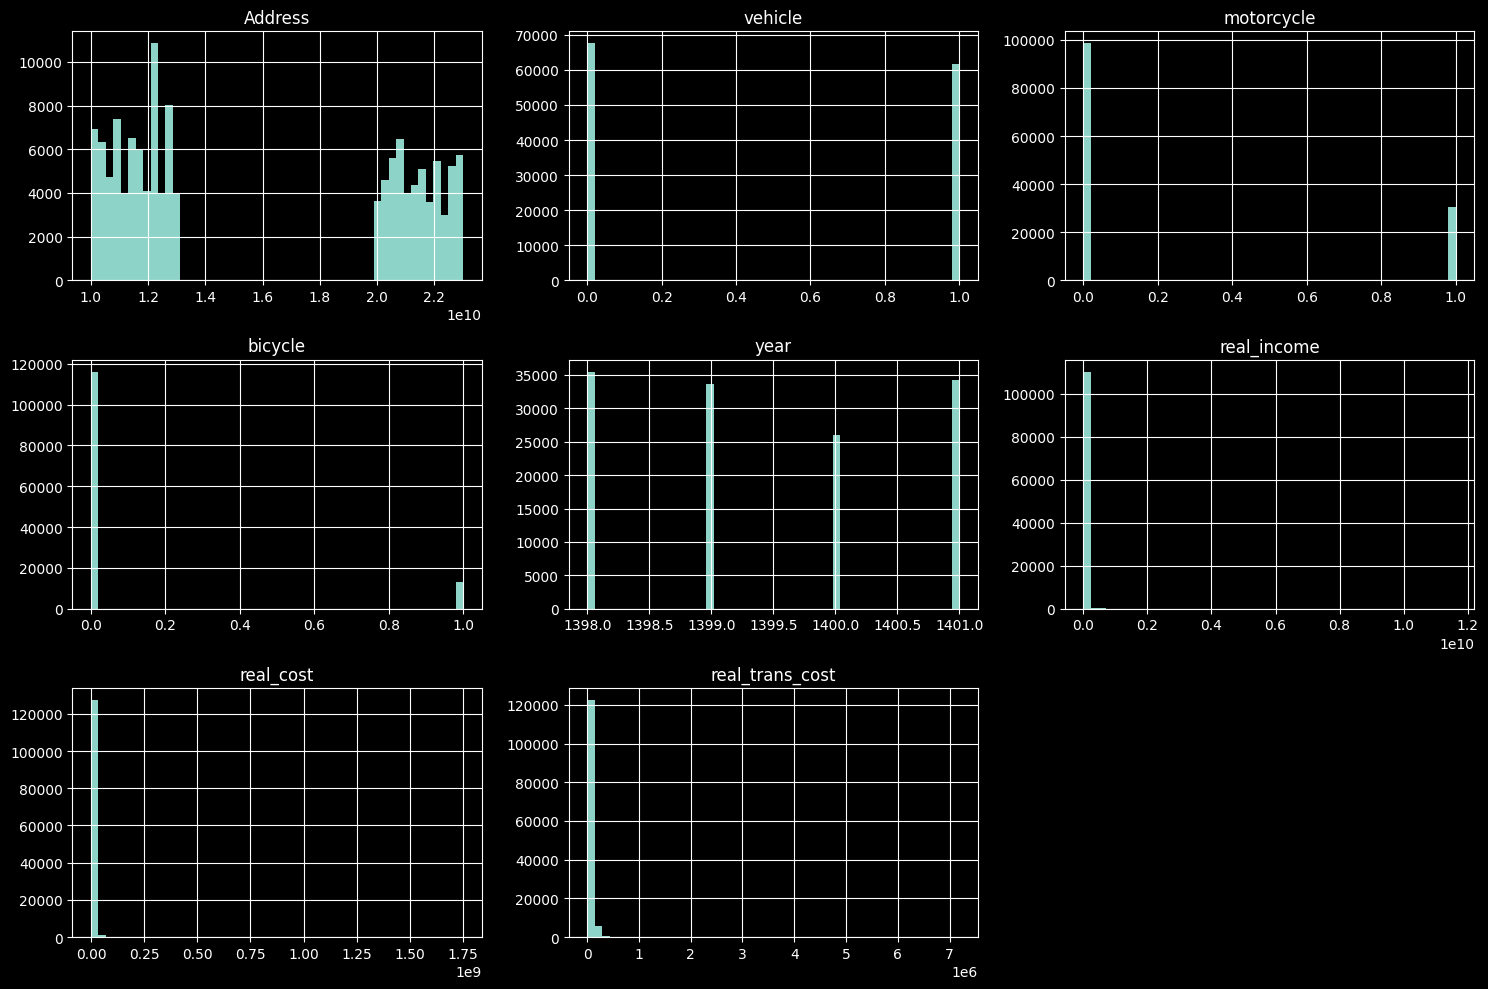

In [107]:
df_ml_real.hist(bins=50, figsize=(15, 10))
plt.tight_layout()
plt.show()

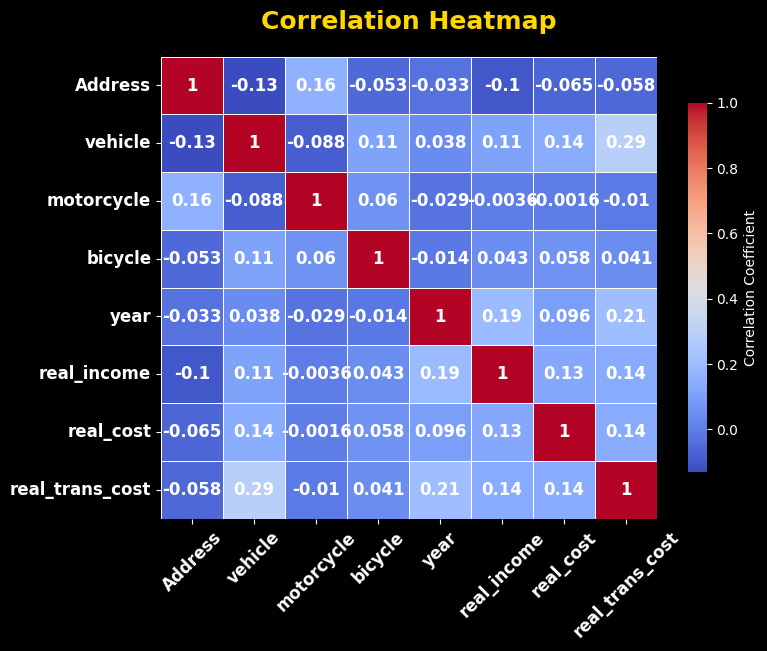

In [108]:
corr_matrix = df_ml_real.corr()

# dark backg
plt.style.use('dark_background')
plt.figure(figsize=(8, 6))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='white',
            cbar_kws={"shrink": .8, 'label': 'Correlation Coefficient'},
            annot_kws={"size": 12, "weight": "bold", "color": "#FFFFFF"})

plt.title('Correlation Heatmap', fontsize=18, color='#FFD700', weight='bold', pad=20)
plt.xticks(fontsize=12, color='#FFFFFF', weight='bold', rotation=45)
plt.yticks(fontsize=12, color='#FFFFFF', weight='bold')

plt.show()


# Uisng XGBRegressor

In [109]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

X = df_ml_real.drop(columns=['real_trans_cost', 'motorcycle']) 
y = df_ml_real['real_trans_cost'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', 'passthrough'),
    ('xgb', XGBRegressor())
])

param_grid = {
    'scaler': ['passthrough', StandardScaler(), MinMaxScaler()],  
    'xgb__n_estimators': [50, 100, 200, 300],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.1, 0.2, 0.3],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', verbose=1)
grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f'Best R2 score: {r2}')
print(f'Best parameters: {grid_search.best_params_}')

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best R2 score: 0.16736756877035397
Best parameters: {'scaler': 'passthrough', 'xgb__learning_rate': 0.2, 'xgb__max_depth': 3, 'xgb__n_estimators': 200}


# Using LinearRegression

In [110]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA

X = df_ml_real.drop(columns=['real_trans_cost', 'motorcycle']) 
y = df_ml_real['real_trans_cost'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([   
    ('scaler', 'passthrough'),               
    ('lr', LinearRegression()),
])

param_grid = {
    'scaler': ['passthrough', StandardScaler(), MinMaxScaler()],  # Test both scalers
    'lr__fit_intercept': [True, False],          
    'lr__positive': [True, False],               
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'Best parameters: {grid_search.best_params_}')
print(f'R-squared score: {r2}')

ValueError: 
All the 60 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "e:\python 3.12.0\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\python 3.12.0\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\python 3.12.0\Lib\site-packages\sklearn\pipeline.py", line 473, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "e:\python 3.12.0\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\python 3.12.0\Lib\site-packages\sklearn\linear_model\_base.py", line 609, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "e:\python 3.12.0\Lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\python 3.12.0\Lib\site-packages\sklearn\utils\validation.py", line 1301, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "e:\python 3.12.0\Lib\site-packages\sklearn\utils\validation.py", line 1064, in check_array
    _assert_all_finite(
  File "e:\python 3.12.0\Lib\site-packages\sklearn\utils\validation.py", line 123, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "e:\python 3.12.0\Lib\site-packages\sklearn\utils\validation.py", line 172, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


# Using RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

X = df_ml_real.drop(columns=['real_trans_cost', 'Address']) 
y = df_ml_real['real_trans_cost'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42)) 
])

param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [10, 20, 30], 
    'rf__min_samples_split': [2, 5],         
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f'Best parameters: {grid_search.best_params_}')
print(f'R-squared score: {r2}')

# Using DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

X = df_ml_real.drop(columns=['real_trans_cost', 'Address', 'motorcycle', 'bicycle']) 
y = df_ml_real['real_trans_cost'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', 'passthrough')
    ('dt', DecisionTreeRegressor(random_state=42))  
])

param_grid = {
    'scaler': ['passthrough', StandardScaler(), MinMaxScaler()], 
    'dt__max_depth': [5, 10, 20, 30],      
    'dt__min_samples_split': [2, 10, 20],    
    'dt__min_samples_leaf': [1, 5, 10],    
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'Best parameters: {grid_search.best_params_}')
print(f'R-squared score: {r2}')

# Approach 2

In [ ]:
not_real_df_ml = df_ML.drop(['real_income','real_cost','real_trans_cost'],axis=1)
not_real_df_ml.head()

In [ ]:
not_real_df_ml.describe()

## <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 24px; color: #ffffff; font-weight: bold; padding: 12px; border-radius: 8px; background: linear-gradient(#2EA149, #1e3a8a, #4f46e5); text-align: right;"> نمودارها</div>


In [ ]:
not_real_df_ml.hist(bins=50, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [ ]:
corr_matrix = not_real_df_ml.corr()

# dark backg
plt.style.use('dark_background')
plt.figure(figsize=(8, 6))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='white',
            cbar_kws={"shrink": .8, 'label': 'Correlation Coefficient'},
            annot_kws={"size": 12, "weight": "bold", "color": "#FFFFFF"})

plt.title('Correlation Heatmap', fontsize=18, color='#FFD700', weight='bold', pad=20)
plt.xticks(fontsize=12, color='#FFFFFF', weight='bold', rotation=45)
plt.yticks(fontsize=12, color='#FFFFFF', weight='bold')

plt.show()


# Using LinearRegression

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = not_real_df_ml.drop(columns=['trans_cost']) 
y = not_real_df_ml['trans_cost'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([  
    ('scaler', StandardScaler()), 
    ('lr', LinearRegression())
])

param_grid = { 
    'lr__fit_intercept': [True, False],          
    'lr__positive': [True, False],               
}


grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'Best parameters: {grid_search.best_params_}')
print(f'R-squared score: {r2}')

# Using DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

X = not_real_df_ml.drop(columns=['trans_cost']) 
y = not_real_df_ml['trans_cost'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('dt', DecisionTreeRegressor())  
])

param_grid = {
    'dt__max_depth': [10, 20, 30],      
    'dt__min_samples_split': [2, 10, 20],    
    'dt__min_samples_leaf': [1, 5, 10],    
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'Best parameters: {grid_search.best_params_}')
print(f'R-squared score: {r2}')

# Uisng XGBRegressor

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

X = not_real_df_ml.drop(columns=['trans_cost', 'motorcycle', 'bicycle']) 
y = not_real_df_ml['trans_cost'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', 'passthrough'),  
    ('xgb', XGBRegressor())
])

param_grid = {
    'scaler': ['passthrough', StandardScaler(), MinMaxScaler()],  # Test both scalers
    'xgb__n_estimators': [50, 100, 200, 300],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.1, 0.2, 0.3],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', verbose=1)
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'Best R2 score: {r2}')
print(f'Best parameters: {grid_search.best_params_}')

# Using RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

X = not_real_df_ml.drop(columns=['trans_cost']) 
y = not_real_df_ml['trans_cost'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('rf', RandomForestRegressor()) 
])

param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [10, 20, 30], 
    'rf__min_samples_split': [2, 5],         
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', verbose=1 , n_jobs=-1)
grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f'Best parameters: {grid_search.best_params_}')
print(f'R-squared score: {r2}')

## <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 24px; color: #ffffff; font-weight: bold; padding: 12px; border-radius: 8px; background: linear-gradient(#2EA149, #1e3a8a, #4f46e5); text-align: right;"> بررسی دیتا</div>

In [27]:
df_ML.head()

,Address,vehicle,motorcycle,bicycle,year,income,cost,trans_cost,real_income,real_cost,real_trans_cost
0,20003386609,0,0,1,1398,2.670000e+08,68752000.0,500000,6.480583e+06,1.668738e+06,12135.922330
1,20010394214,1,1,1,1398,1.448200e+09,192196164.0,2850000,3.515049e+07,4.664955e+06,69174.757282
2,20003387007,0,0,0,1398,6.760000e+07,36833164.0,1000000,1.640777e+06,8.940088e+05,24271.844660
3,20007392616,1,0,0,1398,1.800000e+08,87040000.0,1600000,4.368932e+06,2.112621e+06,38834.951456
4,20006390223,0,1,0,1398,3.216000e+08,405639000.0,200000,7.805825e+06,9.845607e+06,4854.368932


In [28]:
df_ML.shape

(129341, 11)

In [29]:
df_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129341 entries, 0 to 129340
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Address          129341 non-null  int64  
 1   vehicle          129341 non-null  int64  
 2   motorcycle       129341 non-null  int64  
 3   bicycle          129341 non-null  int64  
 4   year             129341 non-null  int64  
 5   income           111172 non-null  float64
 6   cost             129341 non-null  float64
 7   trans_cost       129341 non-null  int64  
 8   real_income      111172 non-null  float64
 9   real_cost        129341 non-null  float64
 10  real_trans_cost  129341 non-null  float64
dtypes: float64(5), int64(6)
memory usage: 10.9 MB


## <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 24px; color: #ffffff; font-weight: bold; padding: 12px; border-radius: 8px; background: linear-gradient(#2EA149, #1e3a8a, #4f46e5); text-align: right;"> چک کردن مقادیر گمشده</div>

In [30]:
df_ML.isna().sum()

Address                0
vehicle                0
motorcycle             0
bicycle                0
year                   0
income             18169
cost                   0
trans_cost             0
real_income        18169
real_cost              0
real_trans_cost        0
dtype: int64

In [31]:
df_ML.loc[df_ML['year'] == 1398 , 'income'].isnull().sum()

np.int64(18)

In [32]:
df_ML.loc[df_ML['year'] == 1399 , 'income'].isnull().sum()

np.int64(8)

In [33]:
df_ML.loc[df_ML['year'] == 1400 , 'income'].isnull().sum()

np.int64(18135)

In [34]:
df_ML.loc[df_ML['year'] == 1401 , 'income'].isnull().sum()

np.int64(8)

## <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 24px; color: #ffffff; font-weight: bold; padding: 12px; border-radius: 8px; background: linear-gradient(#2EA149, #1e3a8a, #4f46e5); text-align: right;"> هندل کردن مقادیر گمشده</div>

<div style="direction: rtl; text-align: right; font-family: 'Vazir', sans-serif; background-color: #2c3e50; padding: 20px; border-radius: 8px; box-shadow: 0px 0px 10px rgba(0,0,0,0.3); color: #ecf0f1;">
<h2 style="color: #f1c40f; text-align: center;"> فرضیه</h2>
  
  <p style="font-size: 16px; line-height: 1.6;">
  میخواهیم ببینیم ایا رابطه ایی بین هزینه و درآمد وجود داره یا خیر. یعنی آیا هزینه بیشتر خانواده به معنای درآمد بیشتر اش است.
  </p>
</div>

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\OMO\AppData\Local\Temp\ipykernel_20260\324153423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ML['log_income'] = np.log1p(df_ML['income'])  # Use log1p to handle zero values


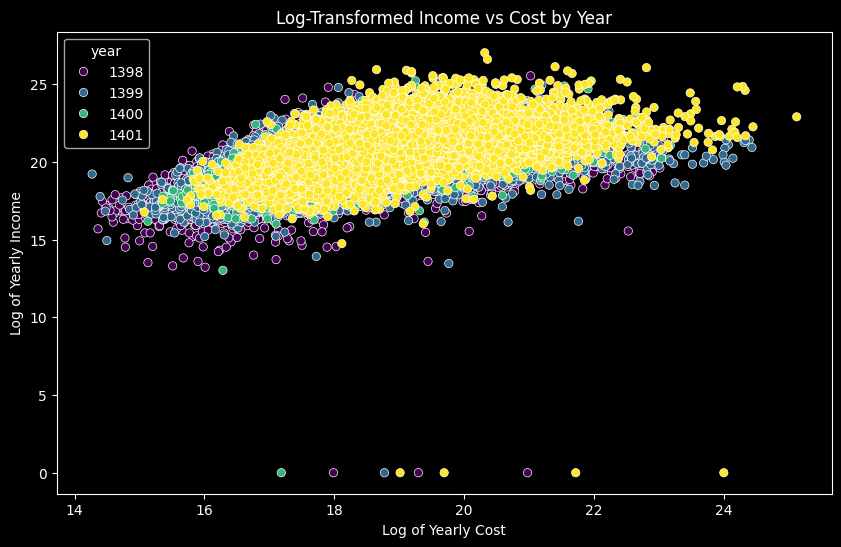

In [39]:
# Apply log transformation
df_ML['log_income'] = np.log1p(df_ML['income'])  # Use log1p to handle zero values
df_ML['log_cost'] = np.log1p(df_ML['cost'])

# Plot again with log-transformed values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='log_cost', y='log_income', hue='year', data=df_ML, palette='viridis')
plt.title('Log-Transformed Income vs Cost by Year')
plt.xlabel('Log of Yearly Cost')
plt.ylabel('Log of Yearly Income')
plt.show()

In [41]:
# Correlation between income and cost
correlation = df_ML['income'].corr(df_ML['cost'])
print(f"Correlation between income and cost: {correlation}")

Correlation between income and cost: 0.12804598182651228


<div style="direction: rtl; text-align: right; font-family: 'Vazir', sans-serif; background-color: #2c3e50; padding: 20px; border-radius: 8px; box-shadow: 0px 0px 10px rgba(0,0,0,0.3); color: #ecf0f1;">
  <h2 style="color: #f1c40f; text-align: center;"> گزارش هندل کردن مقادیر گمشده</h2>
  
  <h3 style="color: #2ecc71;">تحلیل:</h3>
  
  <p style="font-size: 16px; line-height: 1.6;">
 برای این کار از نمودار log استفاده کردیم.
  </p>

  <p style="font-size: 16px; line-height: 1.6;">
  نمودار بالا نشان میدهد که بین هزینه و درآمد خانوارها رابطه ی مستقیمی وجود داره. بنابرین از این رابطه میتوان برای هندل کردن مقادیر گمشده در ستون درآمد استفاده کرد.
  </p>
  <ul style="font-size: 16px; line-height: 1.8;">
    <li><strong>correlation مقدار :</strong> <span style="color: #e74c3c;">0.128</span></li>
  </ul>

  <p style="font-size: 16px; line-height: 1.6;">
  با بدست آرودن کورلیشن متوجه می شویم که رابطه ی ضعیفی بین درامد و هزنیه وجود دار.
  </p>

  <p style="font-size: 16px; line-height: 1.6; color: #27ae60;">
  تصیمیم میگیریم از روش دیگری برای هندل کردن مقادیر گشمده استفاده کنیم.
  </p>
</div>

In [42]:
from sklearn.impute import KNNImputer

In [43]:
imputer = KNNImputer(n_neighbors=5)

# Apply the imputer on income and cost columns
df_ML[['income']] = imputer.fit_transform(df_ML[['income']])

# Checking again for missing values
df_ML.isnull().sum()  

Address                0
vehicle                0
motorcycle             0
bicycle                0
year                   0
income                 0
cost                   0
trans_cost             0
real_income        18169
real_cost              0
real_trans_cost        0
log_income         18169
log_cost               0
dtype: int64

In [44]:
imputer = KNNImputer(n_neighbors=5)

# Apply the imputer on income and cost columns
df_ML[['real_income']] = imputer.fit_transform(df_ML[['real_income']])

# Checking again for missing values
df_ML.isnull().sum() 

Address                0
vehicle                0
motorcycle             0
bicycle                0
year                   0
income                 0
cost                   0
trans_cost             0
real_income            0
real_cost              0
real_trans_cost        0
log_income         18169
log_cost               0
dtype: int64

In [ ]:
df_ML.head()

## <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 24px; color: #ffffff; font-weight: bold; padding: 12px; border-radius: 8px; background: linear-gradient(#2EA149, #1e3a8a, #4f46e5); text-align: right;"> رسم نمودار ماتریس همبستگی</div>

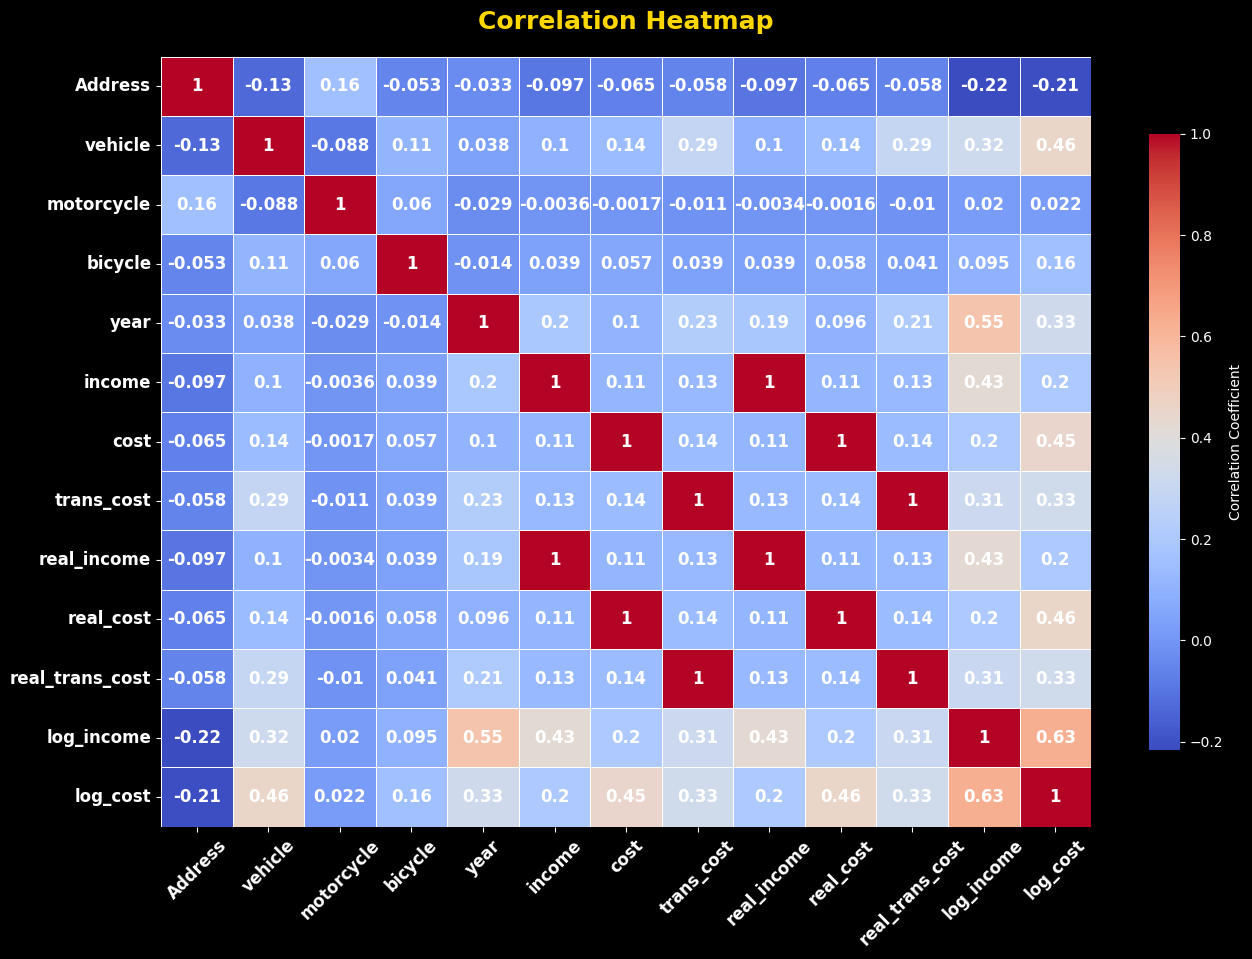

In [46]:
corr_matrix = df_ML.corr()

# dark backg
plt.style.use('dark_background')
plt.figure(figsize=(15, 10))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='white',
            cbar_kws={"shrink": .8, 'label': 'Correlation Coefficient'},
            annot_kws={"size": 12, "weight": "bold", "color": "#FFFFFF"})

plt.title('Correlation Heatmap', fontsize=18, color='#FFD700', weight='bold', pad=20)
plt.xticks(fontsize=12, color='#FFFFFF', weight='bold', rotation=45)
plt.yticks(fontsize=12, color='#FFFFFF', weight='bold')

plt.show() 

In [48]:
df_new = df_ML.copy()
df_new

,Address,vehicle,motorcycle,bicycle,year,income,cost,trans_cost,real_income,real_cost,real_trans_cost,log_income,log_cost
0,20003386609,0,0,1,1398,2.670000e+08,6.875200e+07,500000,6.480583e+06,1.668738e+06,12135.922330,19.402759,18.046016
1,20010394214,1,1,1,1398,1.448200e+09,1.921962e+08,2850000,3.515049e+07,4.664955e+06,69174.757282,21.093587,19.074027
2,20003387007,0,0,0,1398,6.760000e+07,3.683316e+07,1000000,1.640777e+06,8.940088e+05,24271.844660,18.029119,17.421909
3,20007392616,1,0,0,1398,1.800000e+08,8.704000e+07,1600000,4.368932e+06,2.112621e+06,38834.951456,19.008467,18.281878
4,20006390223,0,1,0,1398,3.216000e+08,4.056390e+08,200000,7.805825e+06,9.845607e+06,4854.368932,19.588819,19.820974
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129336,13001373136,1,0,0,1401,5.230000e+09,1.293727e+09,9500000,1.124731e+08,2.782209e+07,204301.075269,22.377677,20.980793
129337,13001373138,1,0,0,1401,1.763980e+09,4.092450e+08,5200000,3.793505e+07,8.800968e+06,111827.956989,21.290838,19.829825
129338,13001370341,0,0,0,1401,1.897520e+09,1.559038e+08,4500000,4.080688e+07,3.352770e+06,96774.193548,21.363814,18.864750
129339,22104612941,0,0,0,1401,1.450200e+08,1.005710e+08,1000000,3.118710e+06,2.162817e+06,21505.376344,18.792382,18.426375


## <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 24px; color: #ffffff; font-weight: bold; padding: 12px; border-radius: 8px; background: linear-gradient(#2EA149, #1e3a8a, #4f46e5); text-align: right;"> چک و هندل کردن مقادیر پرت</div>

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [50]:
df_new['vehicle'] = df_new['vehicle'].astype(int)
df_new['motorcycle'] = df_new['motorcycle'].astype(int)
df_new['bicycle'] = df_new['bicycle'].astype(int)

C:\Users\OMO\AppData\Local\Temp\ipykernel_20260\2934604866.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Variable', y='Value', data=df_melted, palette='Set3')


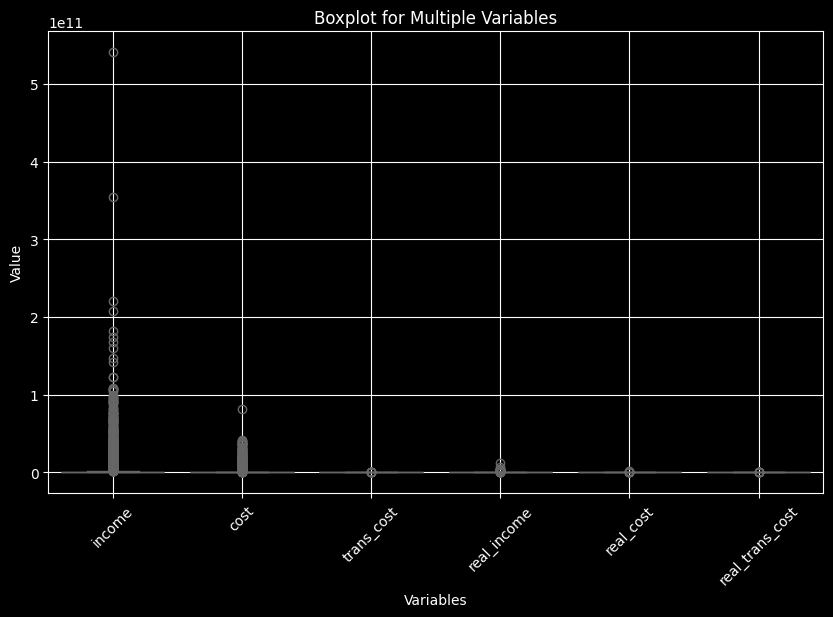

In [51]:
df_melted = df_new.melt(value_vars=['income', 'cost', 'trans_cost', 'real_income', 'real_cost', 'real_trans_cost'],
                      var_name='Variable', value_name='Value')

# Plotting the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Variable', y='Value', data=df_melted, palette='Set3')
plt.title('Boxplot for Multiple Variables')
plt.xlabel('Variables')
plt.ylabel('Value')
plt.xticks(rotation=45) 
plt.grid(True)
plt.show() 

In [52]:
import numpy as np
import pandas as pd

def remove_outliers_zscore(df, columns, threshold=3):
    print("Old Shape: ", df.shape)
    # Copy the dataframe to avoid modifying the original one
    df_clean = df.copy()
    
    # Calculate the Z-scores for each specified column
    for col in columns:
        col_mean = df_clean[col].mean()
        col_std = df_clean[col].std()
        
        # Compute Z-scores
        z_scores = (df_clean[col] - col_mean) / col_std
        
        # Filter rows where Z-scores are within the threshold
        df_clean = df_clean[(np.abs(z_scores) <= threshold)]
        print("New Shape: ", df_clean.shape)
    
    return df_clean

In [53]:
df_new = remove_outliers_zscore(df_new, ['cost', 'income', 'trans_cost'], threshold=3)
df_new

Old Shape:  (129341, 13)
New Shape:  (128456, 13)
New Shape:  (127702, 13)
New Shape:  (126350, 13)


,Address,vehicle,motorcycle,bicycle,year,income,cost,trans_cost,real_income,real_cost,real_trans_cost,log_income,log_cost
0,20003386609,0,0,1,1398,2.670000e+08,6.875200e+07,500000,6.480583e+06,1.668738e+06,12135.922330,19.402759,18.046016
1,20010394214,1,1,1,1398,1.448200e+09,1.921962e+08,2850000,3.515049e+07,4.664955e+06,69174.757282,21.093587,19.074027
2,20003387007,0,0,0,1398,6.760000e+07,3.683316e+07,1000000,1.640777e+06,8.940088e+05,24271.844660,18.029119,17.421909
3,20007392616,1,0,0,1398,1.800000e+08,8.704000e+07,1600000,4.368932e+06,2.112621e+06,38834.951456,19.008467,18.281878
4,20006390223,0,1,0,1398,3.216000e+08,4.056390e+08,200000,7.805825e+06,9.845607e+06,4854.368932,19.588819,19.820974
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129336,13001373136,1,0,0,1401,5.230000e+09,1.293727e+09,9500000,1.124731e+08,2.782209e+07,204301.075269,22.377677,20.980793
129337,13001373138,1,0,0,1401,1.763980e+09,4.092450e+08,5200000,3.793505e+07,8.800968e+06,111827.956989,21.290838,19.829825
129338,13001370341,0,0,0,1401,1.897520e+09,1.559038e+08,4500000,4.080688e+07,3.352770e+06,96774.193548,21.363814,18.864750
129339,22104612941,0,0,0,1401,1.450200e+08,1.005710e+08,1000000,3.118710e+06,2.162817e+06,21505.376344,18.792382,18.426375


In [54]:
df_new = remove_outliers_zscore(df_new, ['real_income', 'real_cost', 'real_trans_cost'])
df_new

Old Shape:  (126350, 13)
New Shape:  (123597, 13)
New Shape:  (120943, 13)
New Shape:  (118233, 13)


,Address,vehicle,motorcycle,bicycle,year,income,cost,trans_cost,real_income,real_cost,real_trans_cost,log_income,log_cost
0,20003386609,0,0,1,1398,2.670000e+08,68752000.0,500000,6.480583e+06,1.668738e+06,12135.922330,19.402759,18.046016
1,20010394214,1,1,1,1398,1.448200e+09,192196164.0,2850000,3.515049e+07,4.664955e+06,69174.757282,21.093587,19.074027
2,20003387007,0,0,0,1398,6.760000e+07,36833164.0,1000000,1.640777e+06,8.940088e+05,24271.844660,18.029119,17.421909
3,20007392616,1,0,0,1398,1.800000e+08,87040000.0,1600000,4.368932e+06,2.112621e+06,38834.951456,19.008467,18.281878
4,20006390223,0,1,0,1398,3.216000e+08,405639000.0,200000,7.805825e+06,9.845607e+06,4854.368932,19.588819,19.820974
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129332,13001372432,1,0,0,1401,3.679520e+09,324257300.0,4000000,7.912946e+07,6.973275e+06,86021.505376,22.026048,19.597048
129337,13001373138,1,0,0,1401,1.763980e+09,409245000.0,5200000,3.793505e+07,8.800968e+06,111827.956989,21.290838,19.829825
129338,13001370341,0,0,0,1401,1.897520e+09,155903800.0,4500000,4.080688e+07,3.352770e+06,96774.193548,21.363814,18.864750
129339,22104612941,0,0,0,1401,1.450200e+08,100571000.0,1000000,3.118710e+06,2.162817e+06,21505.376344,18.792382,18.426375


In [55]:
df_new = remove_outliers_zscore(df_new, ['real_income', 'real_cost', 'real_trans_cost'])
df_new

Old Shape:  (118233, 13)
New Shape:  (115390, 13)
New Shape:  (112583, 13)
New Shape:  (110486, 13)


,Address,vehicle,motorcycle,bicycle,year,income,cost,trans_cost,real_income,real_cost,real_trans_cost,log_income,log_cost
0,20003386609,0,0,1,1398,2.670000e+08,68752000.0,500000,6.480583e+06,1.668738e+06,12135.922330,19.402759,18.046016
1,20010394214,1,1,1,1398,1.448200e+09,192196164.0,2850000,3.515049e+07,4.664955e+06,69174.757282,21.093587,19.074027
2,20003387007,0,0,0,1398,6.760000e+07,36833164.0,1000000,1.640777e+06,8.940088e+05,24271.844660,18.029119,17.421909
3,20007392616,1,0,0,1398,1.800000e+08,87040000.0,1600000,4.368932e+06,2.112621e+06,38834.951456,19.008467,18.281878
4,20006390223,0,1,0,1398,3.216000e+08,405639000.0,200000,7.805825e+06,9.845607e+06,4854.368932,19.588819,19.820974
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129330,13001369635,0,0,0,1401,2.553200e+09,535938000.0,5700000,5.490753e+07,1.152555e+07,122580.645161,21.660613,20.099529
129337,13001373138,1,0,0,1401,1.763980e+09,409245000.0,5200000,3.793505e+07,8.800968e+06,111827.956989,21.290838,19.829825
129338,13001370341,0,0,0,1401,1.897520e+09,155903800.0,4500000,4.080688e+07,3.352770e+06,96774.193548,21.363814,18.864750
129339,22104612941,0,0,0,1401,1.450200e+08,100571000.0,1000000,3.118710e+06,2.162817e+06,21505.376344,18.792382,18.426375


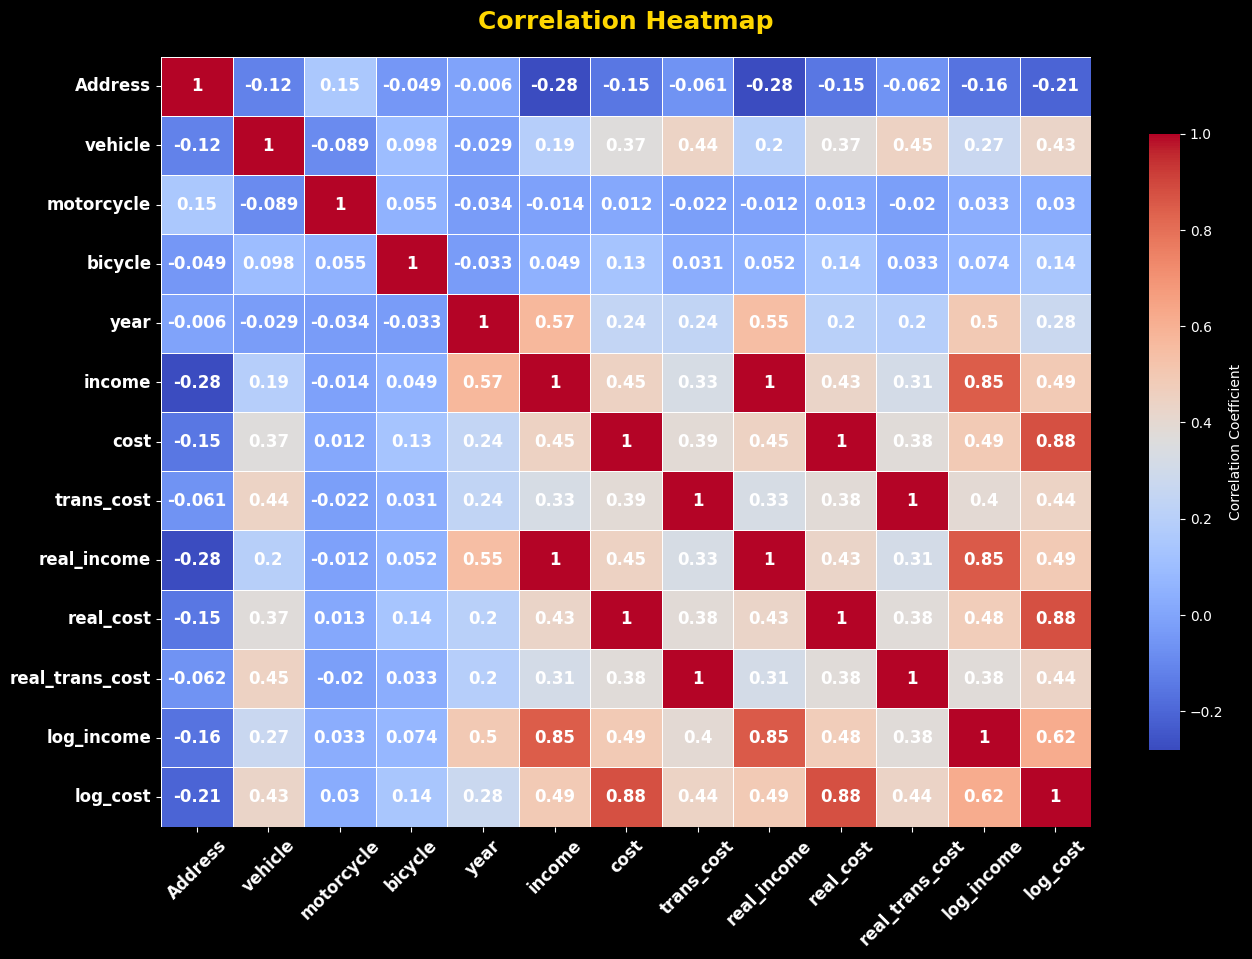

In [57]:
corr_matrix = df_new.corr()

# plt.style.use('dark_background')
plt.figure(figsize=(15, 10))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='white',
            cbar_kws={"shrink": .8, 'label': 'Correlation Coefficient'},
            annot_kws={"size": 12, "weight": "bold", "color": "#FFFFFF"})

plt.title('Correlation Heatmap', fontsize=18, color='#FFD700', weight='bold', pad=20)
plt.xticks(fontsize=12, color='#FFFFFF', weight='bold', rotation=45)
plt.yticks(fontsize=12, color='#FFFFFF', weight='bold')

plt.show()